[__<< Data Cleaning__](./02-Cars4u_data_cleaning.ipynb) | [__Home__](../README.md) | [__Feature Engineering >>__](./04_Cars4u_feature_engineering.ipynb)


# Cars4u: Car Price Prediction
## Exploration Data Analysis

__Dataset:__ [Cars4u](https://www.kaggle.com/datasets/sukhmanibedi/cars4u) \
__Author:__ Dmitry Luchkin \
__Date:__ 2024-07-30

__Objectives:__
   - Visualize the distribution of each feature.
   - Identify correlations between features and the target variable.
   - Summarize the key statistics of the dataset.
   - Identify outliers.

## Table of content

- [Notebooks](#notebooks)
- [Import Libraries](#import-libraries)
- [Notebook Setup](#notebook-setup)
- [Loading Data](#loading-data)
- [EDA](#eda)
  - [Summary Statistics](#summary-statistics)
  - [Univariate Analysis](#univariate-analysis)
  - [Bivariate Analysis](#bivariate-analysis)
  - [Multivariate Analysis](#multivariate-analysis)
- [Save the Data](#save-data)

## Notebooks <a name='notebooks'></a>

+ [01_Cars4u_initial_data_exploration.ipynb](./01_Cars4u_initial_data_exploration.ipynb)
+ [02_Cars4u_data_cleaning.ipynb](./02_Cars4u_data_cleaning.ipynb)
+ [__03_Cars4u_exploratory_data_analysis.ipynb__](./03_Cars4u_exploratory_data_analysis.ipynb)
+ [04_Cars4u_feature_engineering.ipynb](./04_Cars4u_feature_engineering.ipynb)
+ [05_Cars4u_modeling.ipynb](./05_Cars4u_modeling.ipynb)

## Import Libraries <a name='import-libraries'></a>

In [1]:
import sys
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
%matplotlib inline

## Notebook Setup <a name='notebook-setup'></a>

In [2]:
# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.4f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
%config InlineBackend.figure_format = 'retina'

## Loading Data <a name='loading-data'></a>

In [3]:
# loading data
filename = '../00_data/01_cleaned/used_cars_data_cleaned.pkl'

with open(filename, 'rb') as file:
    data = pickle.load(file)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   location            7253 non-null   category
 1   year                7253 non-null   int64   
 2   kilometers_driven   7253 non-null   int64   
 3   fuel_type           7253 non-null   category
 4   transmission        7253 non-null   category
 5   owner_type          7253 non-null   category
 6   engine_cc           7253 non-null   float64 
 7   power_bhp           7253 non-null   float64 
 8   seats               7253 non-null   float64 
 9   price_lakh          6019 non-null   float64 
 10  brand               7253 non-null   category
 11  model               7253 non-null   category
 12  mileage_kmpl        7253 non-null   float64 
 13  new_car_price_lakh  7253 non-null   float64 
dtypes: category(6), float64(6), int64(2)
memory usage: 505.1 KB


In [5]:
# get all tasks from the previous phase
sys.path.append('../02_scripts/')
from todo_list import extract_todo_patterns

print(f'{'-'*5} TASKS FROM PREVIOUS PHASE {'-'*5}')
for todo in extract_todo_patterns('./02_Cars4u_data_cleaning.ipynb'):
    print(f'TODO: {todo}')

----- TASKS FROM PREVIOUS PHASE -----
TODO: Maybe it is the better to remove Electric cars from the dataset


## EDA <a name='eda'></a>

### Summary Statistics <a name='summary-statistics'></a>

In [6]:
data.describe().T

count        mean         std        min         25%  \
year               7,253.0000  2,013.3654      3.2544 1,996.0000  2,011.0000   
kilometers_driven  7,253.0000 58,699.0631 84,427.7206   171.0000 34,000.0000   
engine_cc          7,253.0000  1,615.5563    594.3176    72.0000  1,198.0000   
power_bhp          7,253.0000    112.1736     53.4097    34.2000     74.0000   
seats              7,253.0000      5.2784      0.8067     2.0000      5.0000   
price_lakh         6,019.0000      9.4825     11.1884     0.4400      3.5000   
mileage_kmpl       7,253.0000     18.1528      4.2398     2.1978     15.2600   
new_car_price_lakh 7,253.0000     20.5194     23.5857     3.6263      8.2092   

                           50%         75%            max  
year                2,014.0000  2,016.0000     2,019.0000  
kilometers_driven  53,416.0000 73,000.0000 6,500,000.0000  
engine_cc           1,493.0000  1,968.0000     5,998.0000  
power_bhp              92.7000    138.0300       616.0000  
seats                   5.0000      5.0000        10.0000  
price_lakh              5.6400      9.9550       160.0000  
mileage_kmpl           18.1528     20.9200        28.4000  
new_car_price_lakh     11.6565     18.3845       375.0000

In [7]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numeric_cols = data.select_dtypes(include=np.number).columns
print(f'Categorical columns: {categorical_cols}')
print(f'Numerical columns: {numeric_cols}')

Categorical columns: Index(['location', 'fuel_type', 'transmission', 'owner_type', 'brand',
       'model'],
      dtype='object')
Numerical columns: Index(['year', 'kilometers_driven', 'engine_cc', 'power_bhp', 'seats',
       'price_lakh', 'mileage_kmpl', 'new_car_price_lakh'],
      dtype='object')


### Univariate Analysis <a name='univariate-analysis'></a>

#### Numerical columns

year
Skew: -0.84


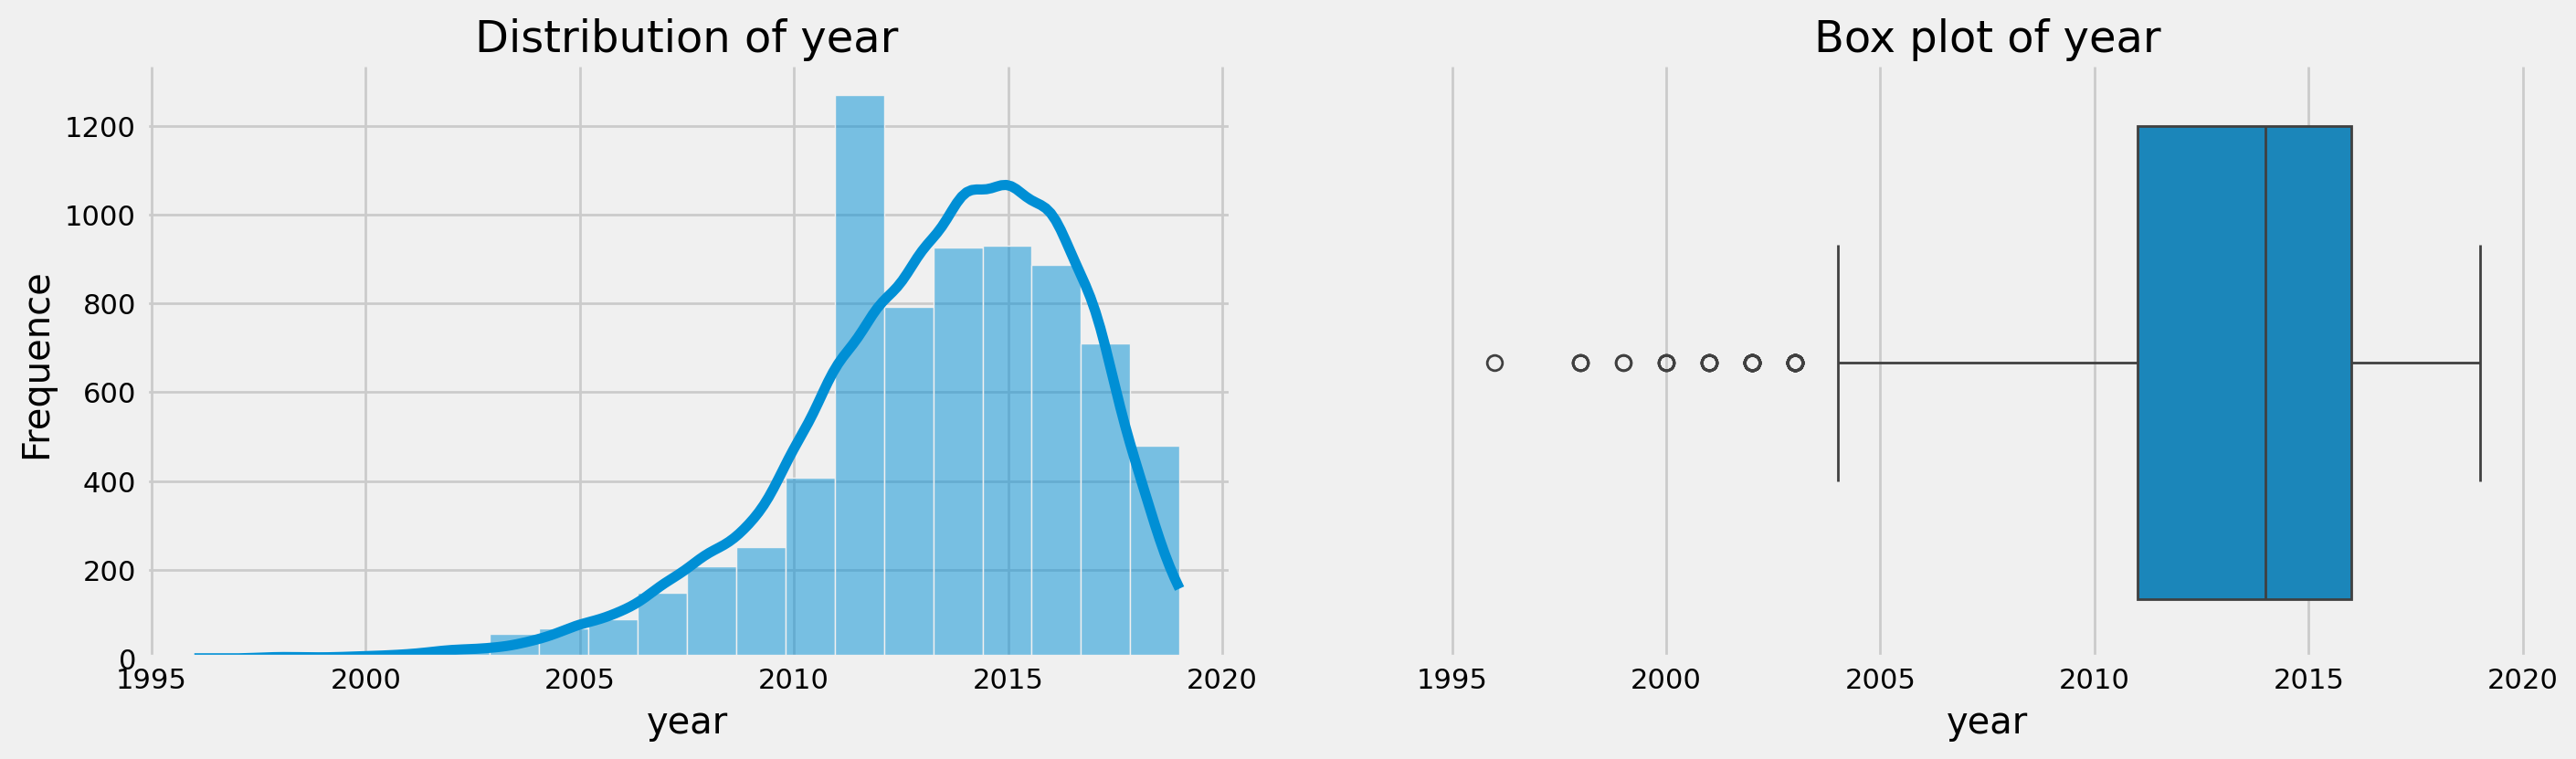

kilometers_driven
Skew: 61.58


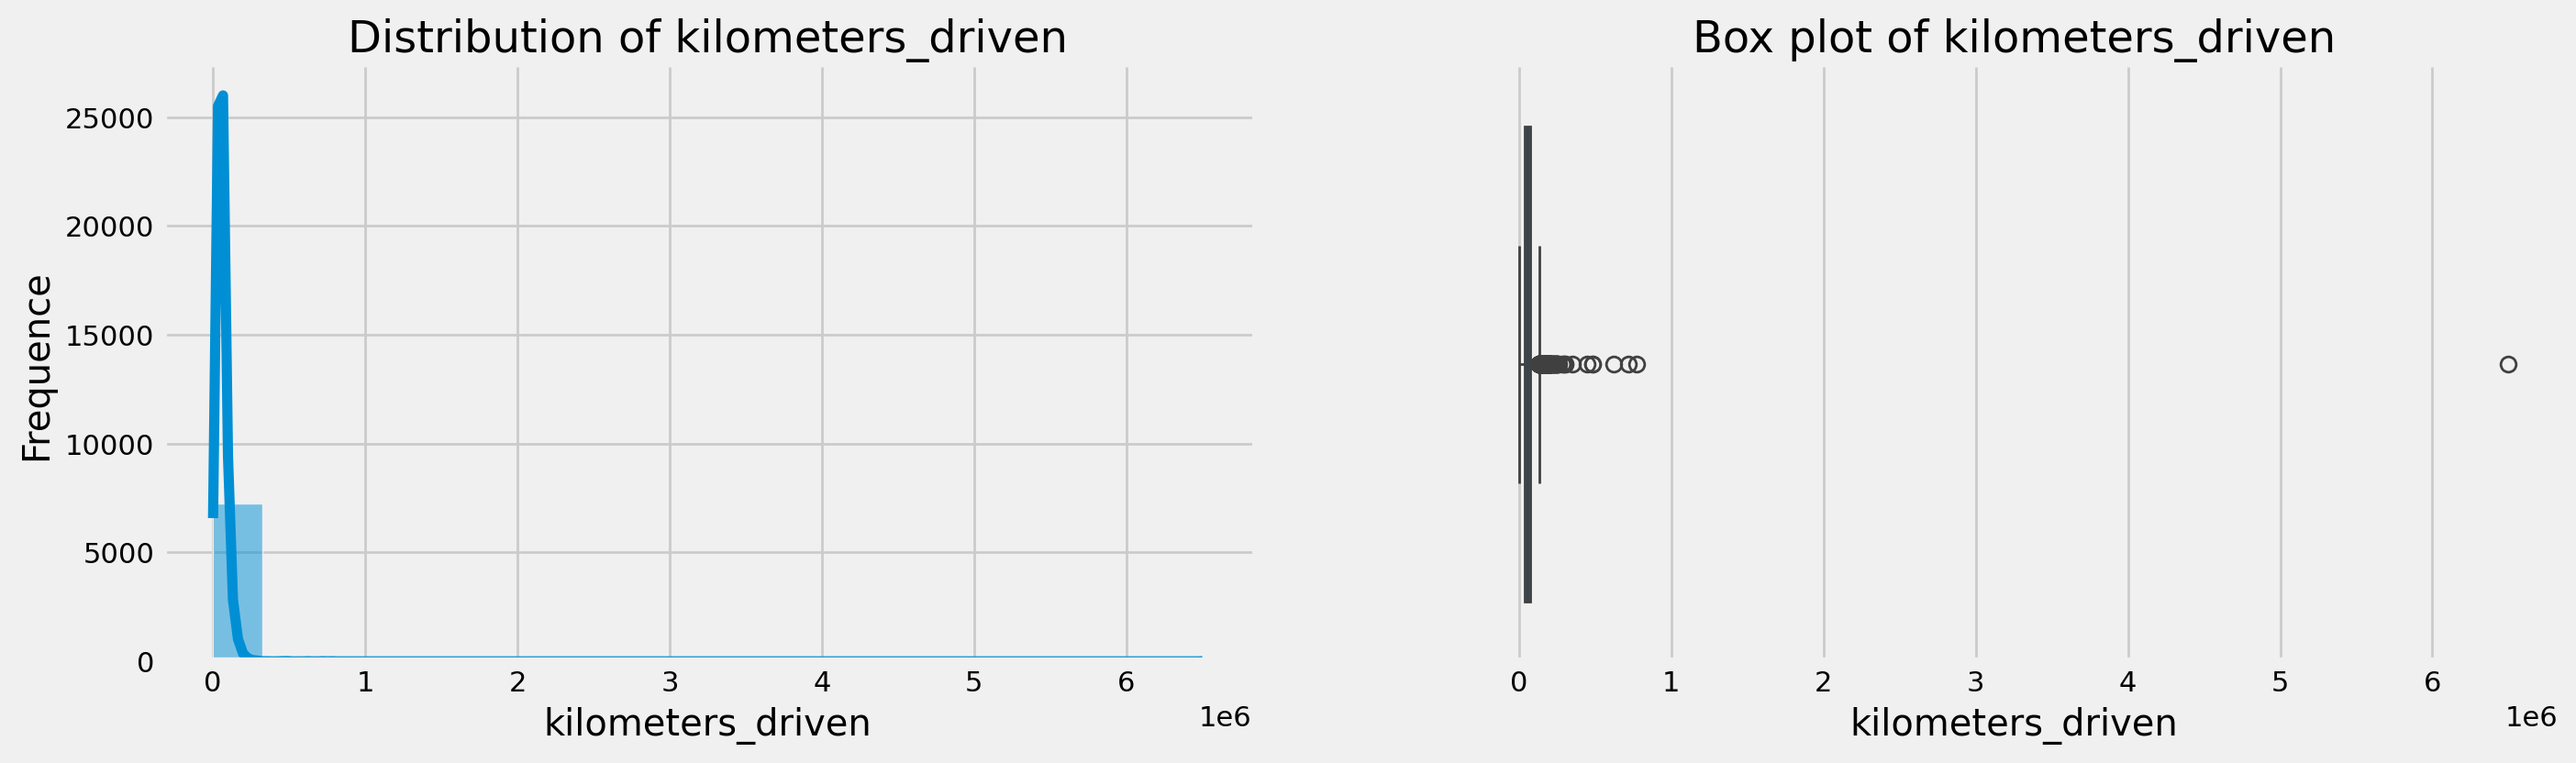

engine_cc
Skew: 1.41


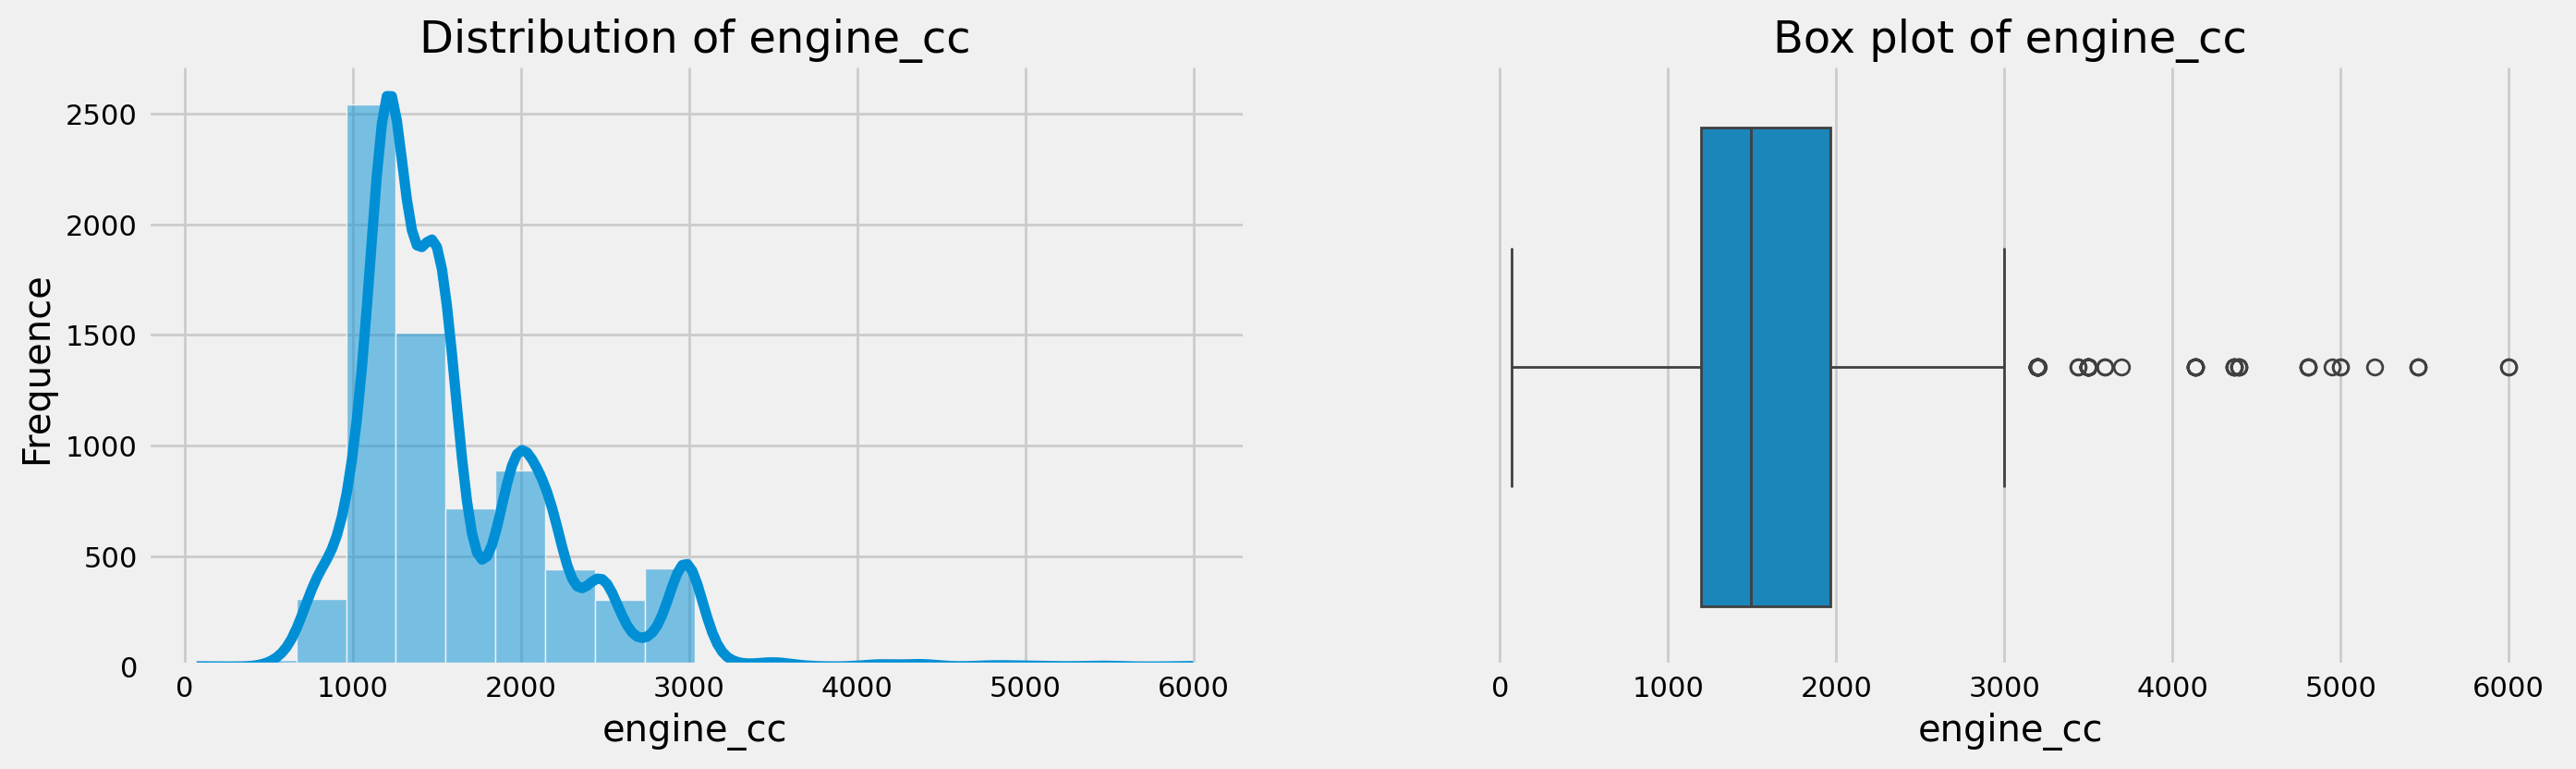

power_bhp
Skew: 1.96


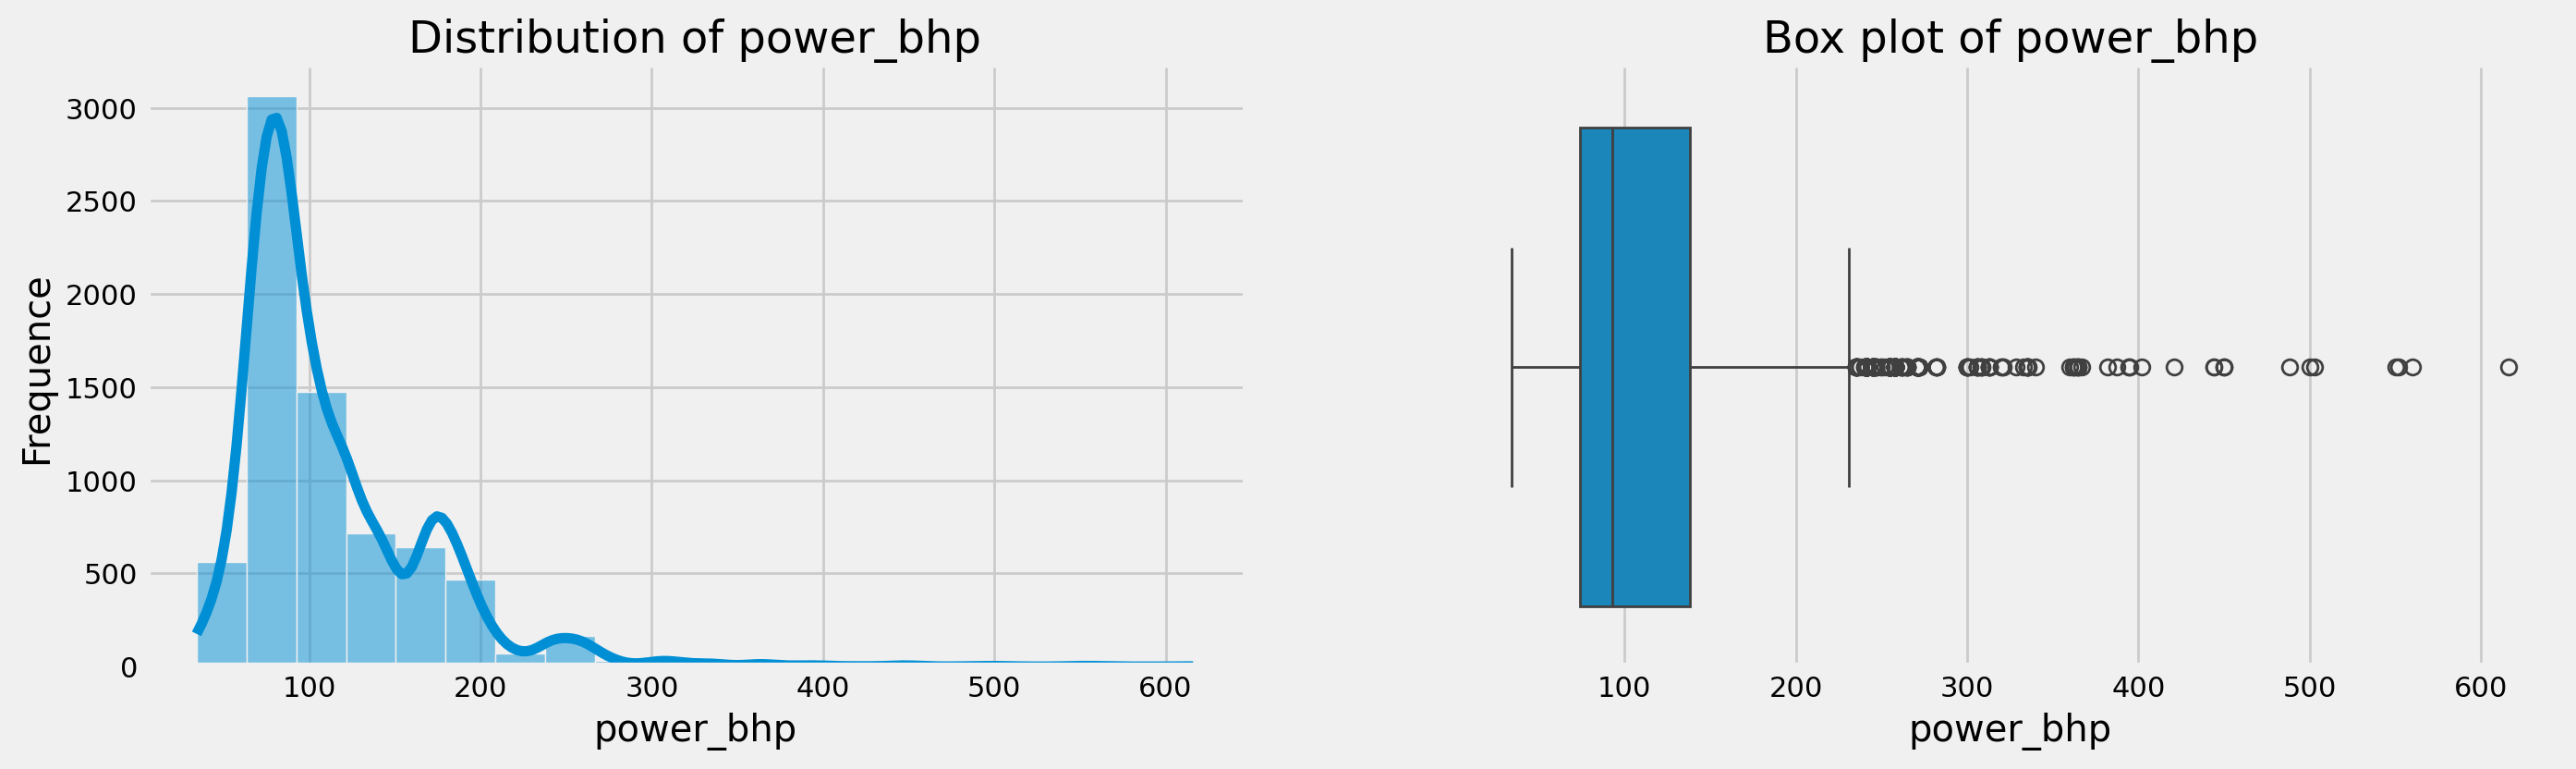

seats
Skew: 1.97


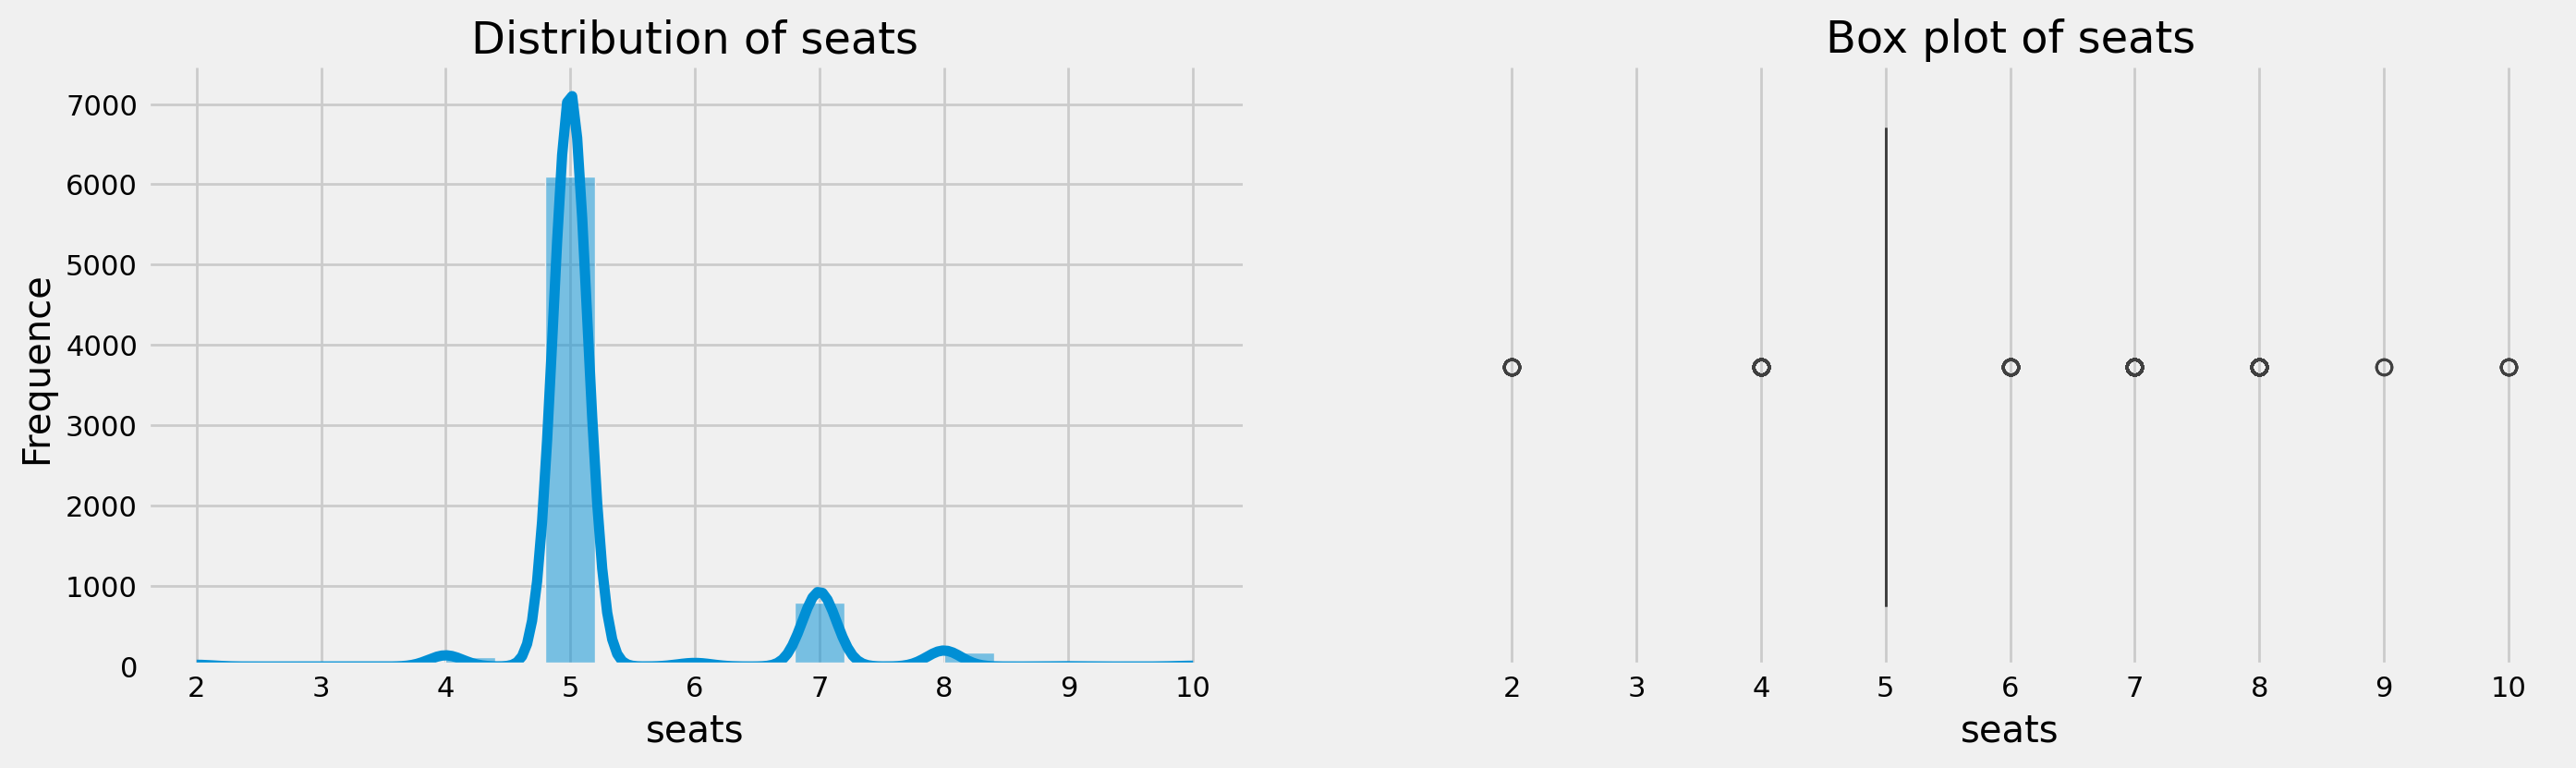

price_lakh
Skew: 3.33


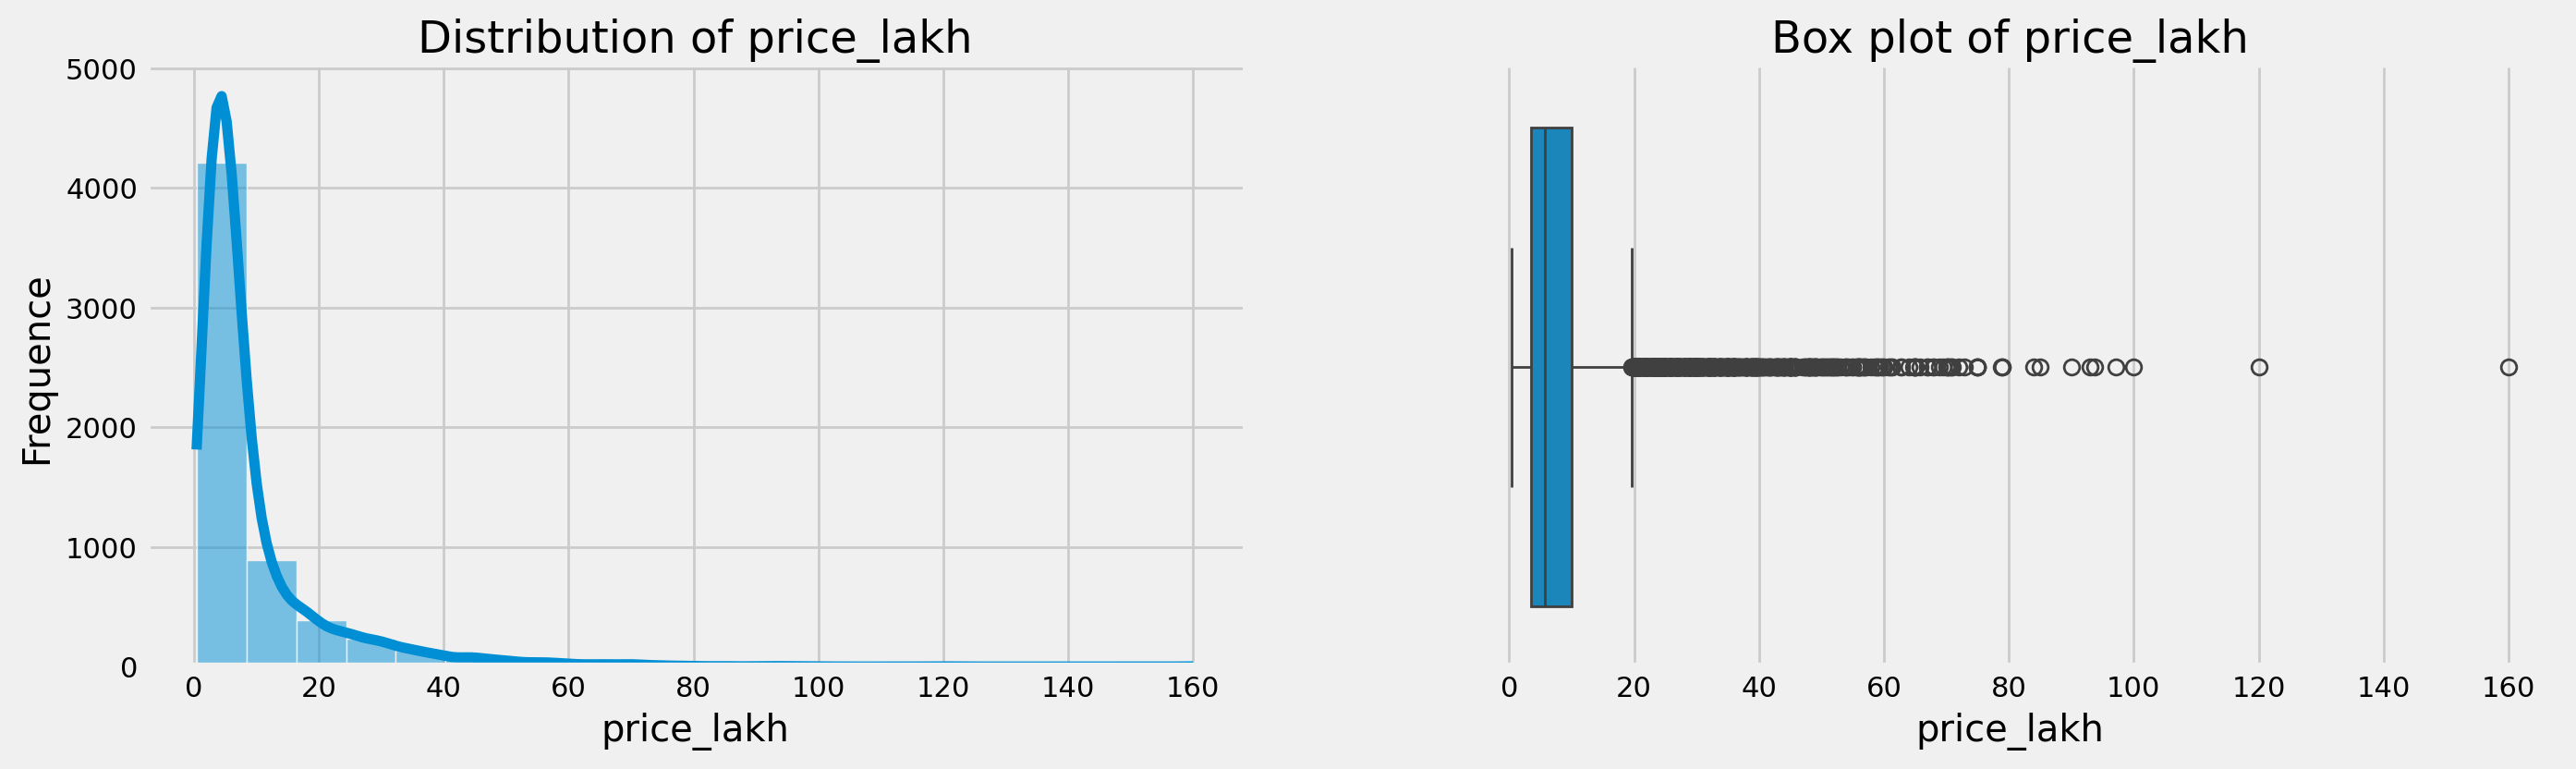

mileage_kmpl
Skew: -0.1


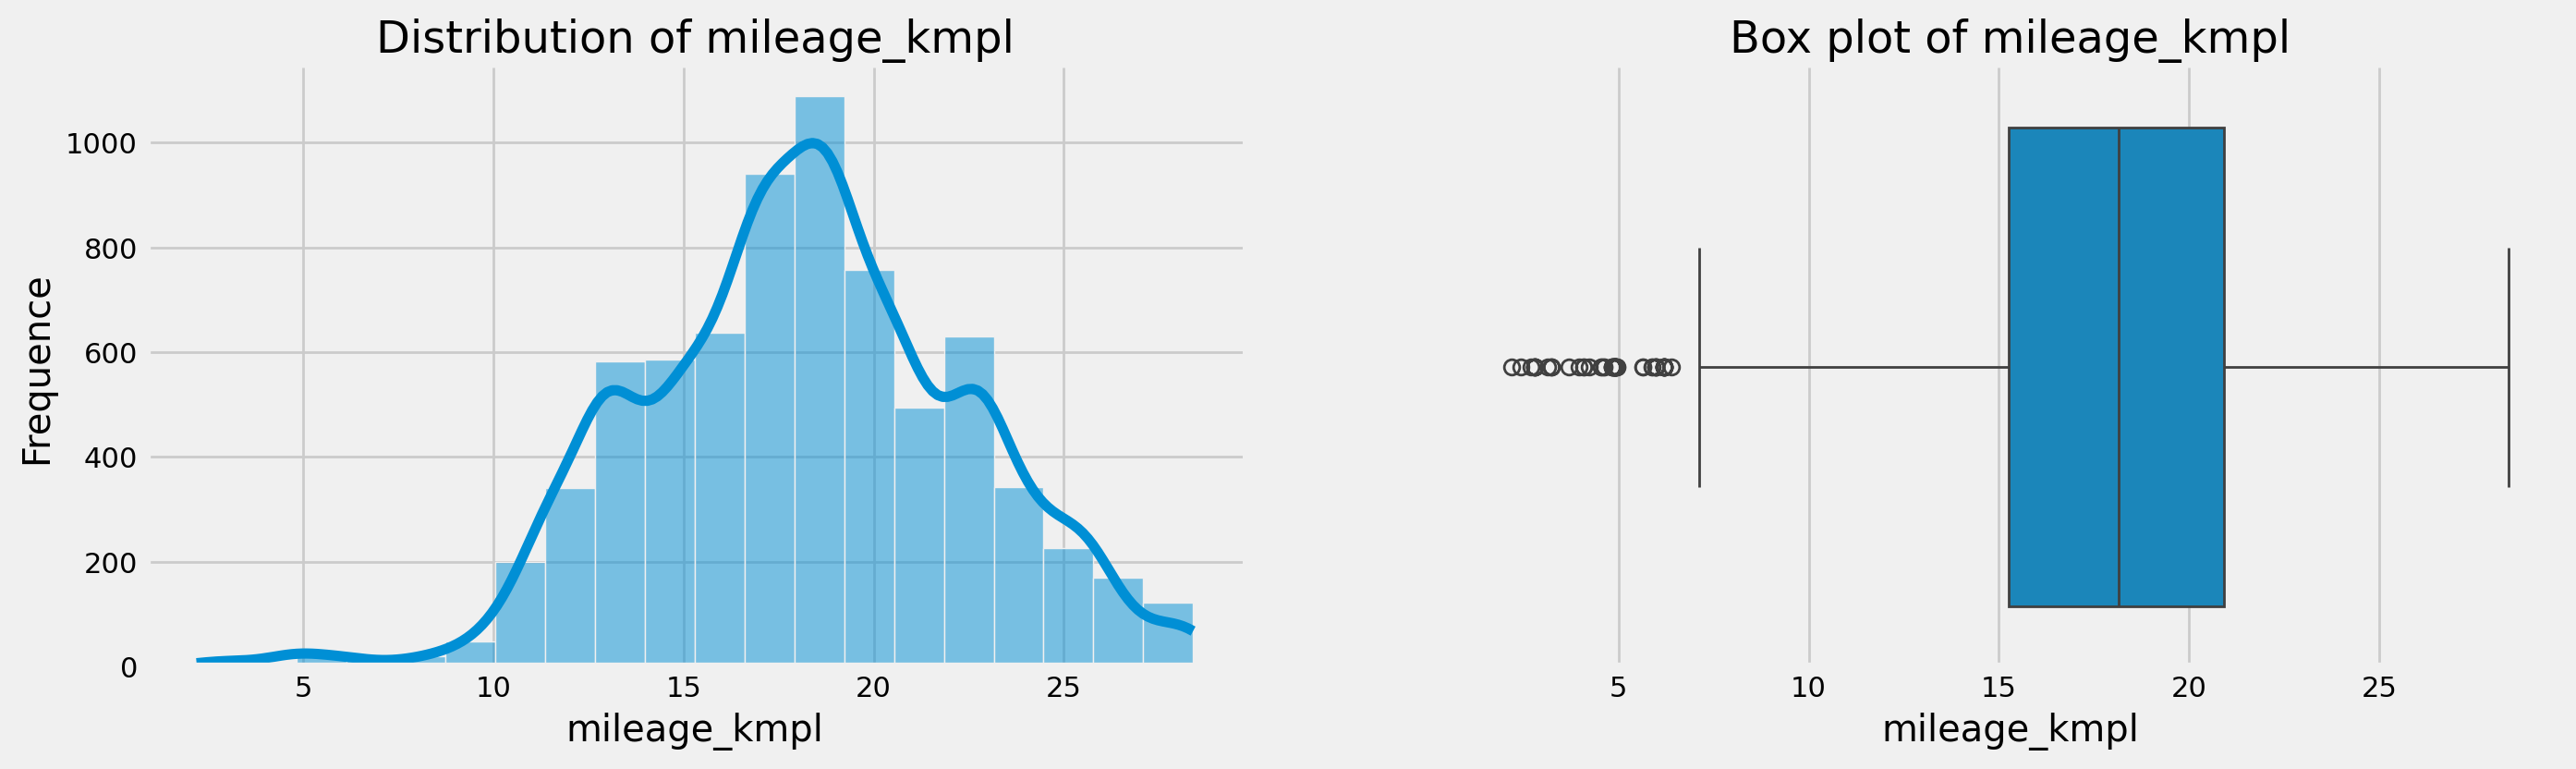

new_car_price_lakh
Skew: 3.39


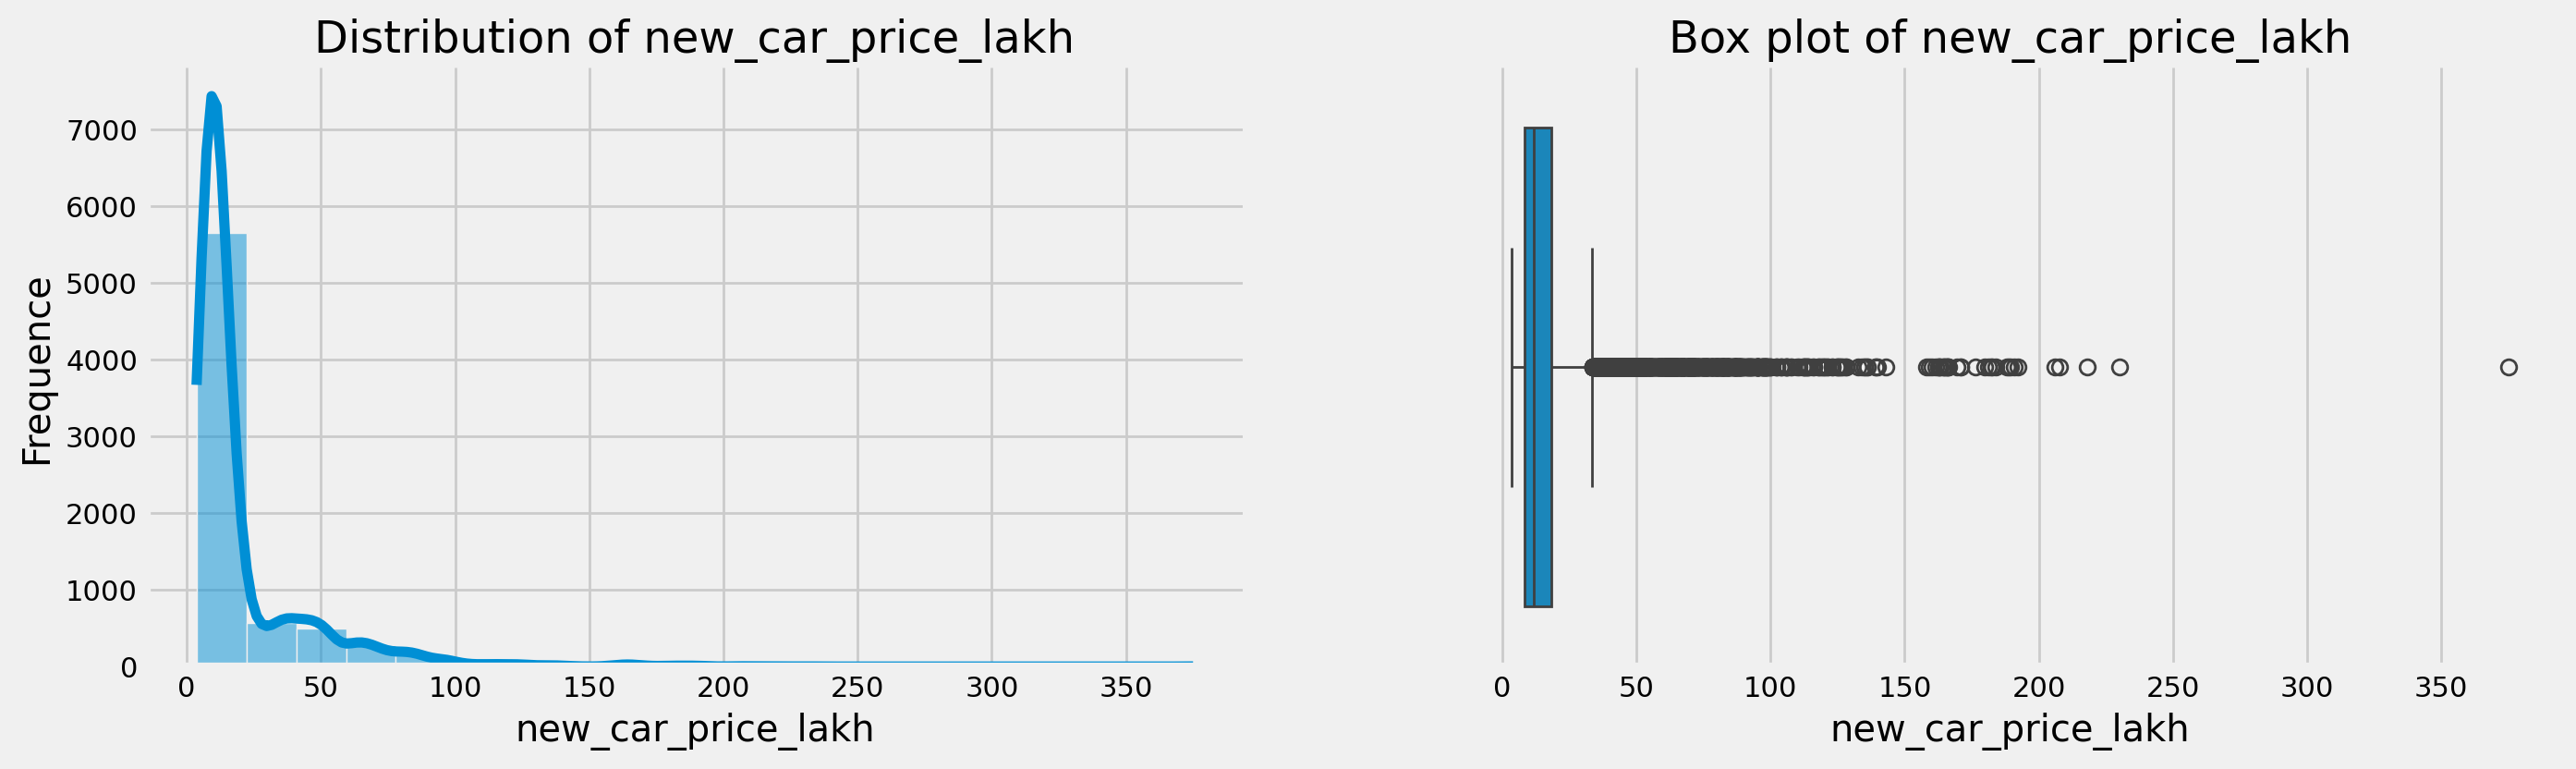

In [8]:
for col in numeric_cols:
    print(col)
    print(f'Skew: {round(data[col].skew(), 2)}')
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.ylabel('Frequence')
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

__Observations:__
- `kilometers_driven`, `price_lakh` and `new_car_price_lakh` are highly skewed and have ouliers which we have to analize.

In [9]:
skewed = data[numeric_cols].apply('skew')
skewed[(skewed > 2.0) | (skewed < -2)].index

Index(['kilometers_driven', 'price_lakh', 'new_car_price_lakh'], dtype='object')

<span style="color:blue">_# TODO: Apply log (Ln(X)) transformation for ['kilometers_driven', 'price_lakh', 'new_car_price_lakh']._</span>

In [10]:
data.sort_values(by=['kilometers_driven'], ascending=False).head(10)

location  year  kilometers_driven fuel_type transmission owner_type  \
2328    Chennai  2017            6500000    Diesel    Automatic      First   
340     Kolkata  2013             775000    Diesel    Automatic      First   
1860    Chennai  2013             720000    Diesel       Manual      First   
358     Chennai  2009             620000    Petrol       Manual      First   
2823    Chennai  2015             480000    Diesel    Automatic      First   
3092    Kolkata  2015             480000    Petrol       Manual      First   
4491  Bangalore  2013             445000    Petrol       Manual      First   
6921     Jaipur  2012             350000    Diesel       Manual      First   
3649     Jaipur  2008             300000    Diesel       Manual      First   
1528  Hyderabad  2005             299322    Diesel       Manual      First   

      engine_cc  power_bhp  seats  price_lakh       brand    model  \
2328 2,993.0000   258.0000 5.0000     65.0000         BMW       X5   
340  1,968.0000   141.0000 5.0000      7.5000       Skoda  Octavia   
1860 1,598.0000   103.6000 5.0000      5.9000  Volkswagen    Vento   
358  1,197.0000    78.9000 5.0000      2.7000     Hyundai      i10   
2823 1,968.0000   138.0300 5.0000     13.0000  Volkswagen    Jetta   
3092 1,497.0000   117.3000 5.0000      5.0000       Honda     City   
4491 1,197.0000    82.9000 5.0000      4.4500     Hyundai      i20   
6921 1,248.0000    74.0000 5.0000         NaN      Maruti    Swift   
3649 1,405.0000    70.0000 5.0000      1.0000        Tata   Indigo   
1528 2,494.0000   102.0000 8.0000      4.0000      Toyota   Innova   

      mileage_kmpl  new_car_price_lakh  
2328       15.9700             77.4015  
340        19.3000             24.2640  
1860       20.5400             13.2198  
358        20.3600             10.1324  
2823       16.9600             16.3329  
3092       17.4000             12.0938  
4491       18.5000             10.2788  
6921       23.4000              7.6454  
3649       17.0000              9.6029  
1528       12.8000             17.1921

Remove the outlier.

In [11]:
data = data[data["kilometers_driven"] < data['kilometers_driven'].max()]

In [12]:
data.sort_values(by=['price_lakh'], ascending=False).head(10)

location  year  kilometers_driven fuel_type transmission owner_type  \
4079   Hyderabad  2017              25000    Diesel    Automatic      First   
5781       Delhi  2011               6500    Petrol    Automatic      Third   
5919   Hyderabad  2015               8000    Petrol    Automatic      First   
1505       Kochi  2019              26013    Diesel    Automatic      First   
1974  Coimbatore  2018              28060    Petrol    Automatic      First   
1984   Bangalore  2017              17465    Petrol    Automatic      First   
4691   Bangalore  2014               3000    Petrol    Automatic     Second   
5535   Ahmedabad  2015              97003    Diesel    Automatic      First   
2095  Coimbatore  2019               2526    Petrol    Automatic      First   
1885       Delhi  2018               6000    Diesel    Automatic      First   

      engine_cc  power_bhp  seats  price_lakh          brand        model  \
4079 2,993.0000   255.0000 5.0000    160.0000     Land Rover  Range Rover   
5781 5,204.0000   560.0000 2.0000    120.0000    Lamborghini     Gallardo   
5919 5,000.0000   488.1000 2.0000    100.0000         Jaguar            F   
1505 2,993.0000   255.0000 5.0000     97.0700     Land Rover  Range Rover   
1974 2,979.0000   320.0000 5.0000     93.6700            BMW            7   
1984 2,979.0000   320.0000 5.0000     93.0000            BMW            7   
4691 5,461.0000   421.0000 2.0000     90.0000  Mercedes-Benz    SLK-Class   
5535 2,993.0000   308.4300 5.0000     85.0000            BMW           X6   
2095 2,996.0000   362.0700 2.0000     83.9600  Mercedes-Benz          SLC   
1885 2,987.0000   258.0000 7.0000     79.0000  Mercedes-Benz          GLS   

      mileage_kmpl  new_car_price_lakh  
4079       13.3300            230.0000  
5781        6.4000             82.5696  
5919       12.5000             97.1546  
1505       12.6500            139.0000  
1974       12.0500            182.5400  
1984       12.0500            183.8156  
4691       12.0000            126.3508  
5535       15.8700             83.6695  
2095       19.0000            106.0000  
1885       11.0000            102.0000

The 10 highest prices of used car are premium brands.

In [13]:
data.sort_values(by=['new_car_price_lakh'], ascending=False).head(10)

location  year  kilometers_driven fuel_type transmission owner_type  \
6354   Bangalore  2008              31200    Petrol    Automatic     Second   
4079   Hyderabad  2017              25000    Diesel    Automatic      First   
3341       Kochi  2010              50161    Petrol    Automatic      First   
3242   Bangalore  2012              63000    Diesel    Automatic     Second   
5416  Coimbatore  2013              75995    Diesel    Automatic     Second   
1352   Bangalore  2012              66538    Diesel    Automatic      First   
1038   Bangalore  2011              55000    Diesel    Automatic      First   
4869  Coimbatore  2012              84384    Diesel    Automatic      First   
152      Kolkata  2010              35277    Petrol    Automatic      First   
589    Bangalore  2006              47088    Petrol    Automatic     Second   

      engine_cc  power_bhp  seats  price_lakh          brand        model  \
6354 5,998.0000   616.0000 5.0000         NaN        Bentley  Flying Spur   
4079 2,993.0000   255.0000 5.0000    160.0000     Land Rover  Range Rover   
3341 4,395.0000   402.0000 5.0000     25.9300            BMW            7   
3242 4,367.0000   335.3000 5.0000     65.0000     Land Rover  Range Rover   
5416 4,367.0000   335.3000 5.0000     65.8100     Land Rover  Range Rover   
1352 4,367.0000   308.0000 7.0000     70.0000     Land Rover  Range Rover   
1038 4,367.0000   308.0000 7.0000     67.0000     Land Rover  Range Rover   
4869 4,367.0000   308.0000 7.0000     52.5400     Land Rover  Range Rover   
152  5,461.0000   362.9000 5.0000     30.0000  Mercedes-Benz      S-Class   
589  3,498.0000   364.9000 5.0000     19.0000  Mercedes-Benz      S-Class   

      mileage_kmpl  new_car_price_lakh  
6354       10.2000            375.0000  
4079       13.3300            230.0000  
3341        8.7700            217.9910  
3242       11.4900            207.5358  
5416       11.4900            206.0956  
1352       10.2000            192.0274  
1038       10.2000            190.7834  
4869       10.2000            189.4595  
152         7.8100            188.9047  
589        10.1300            188.1272

#### Categorical Columns

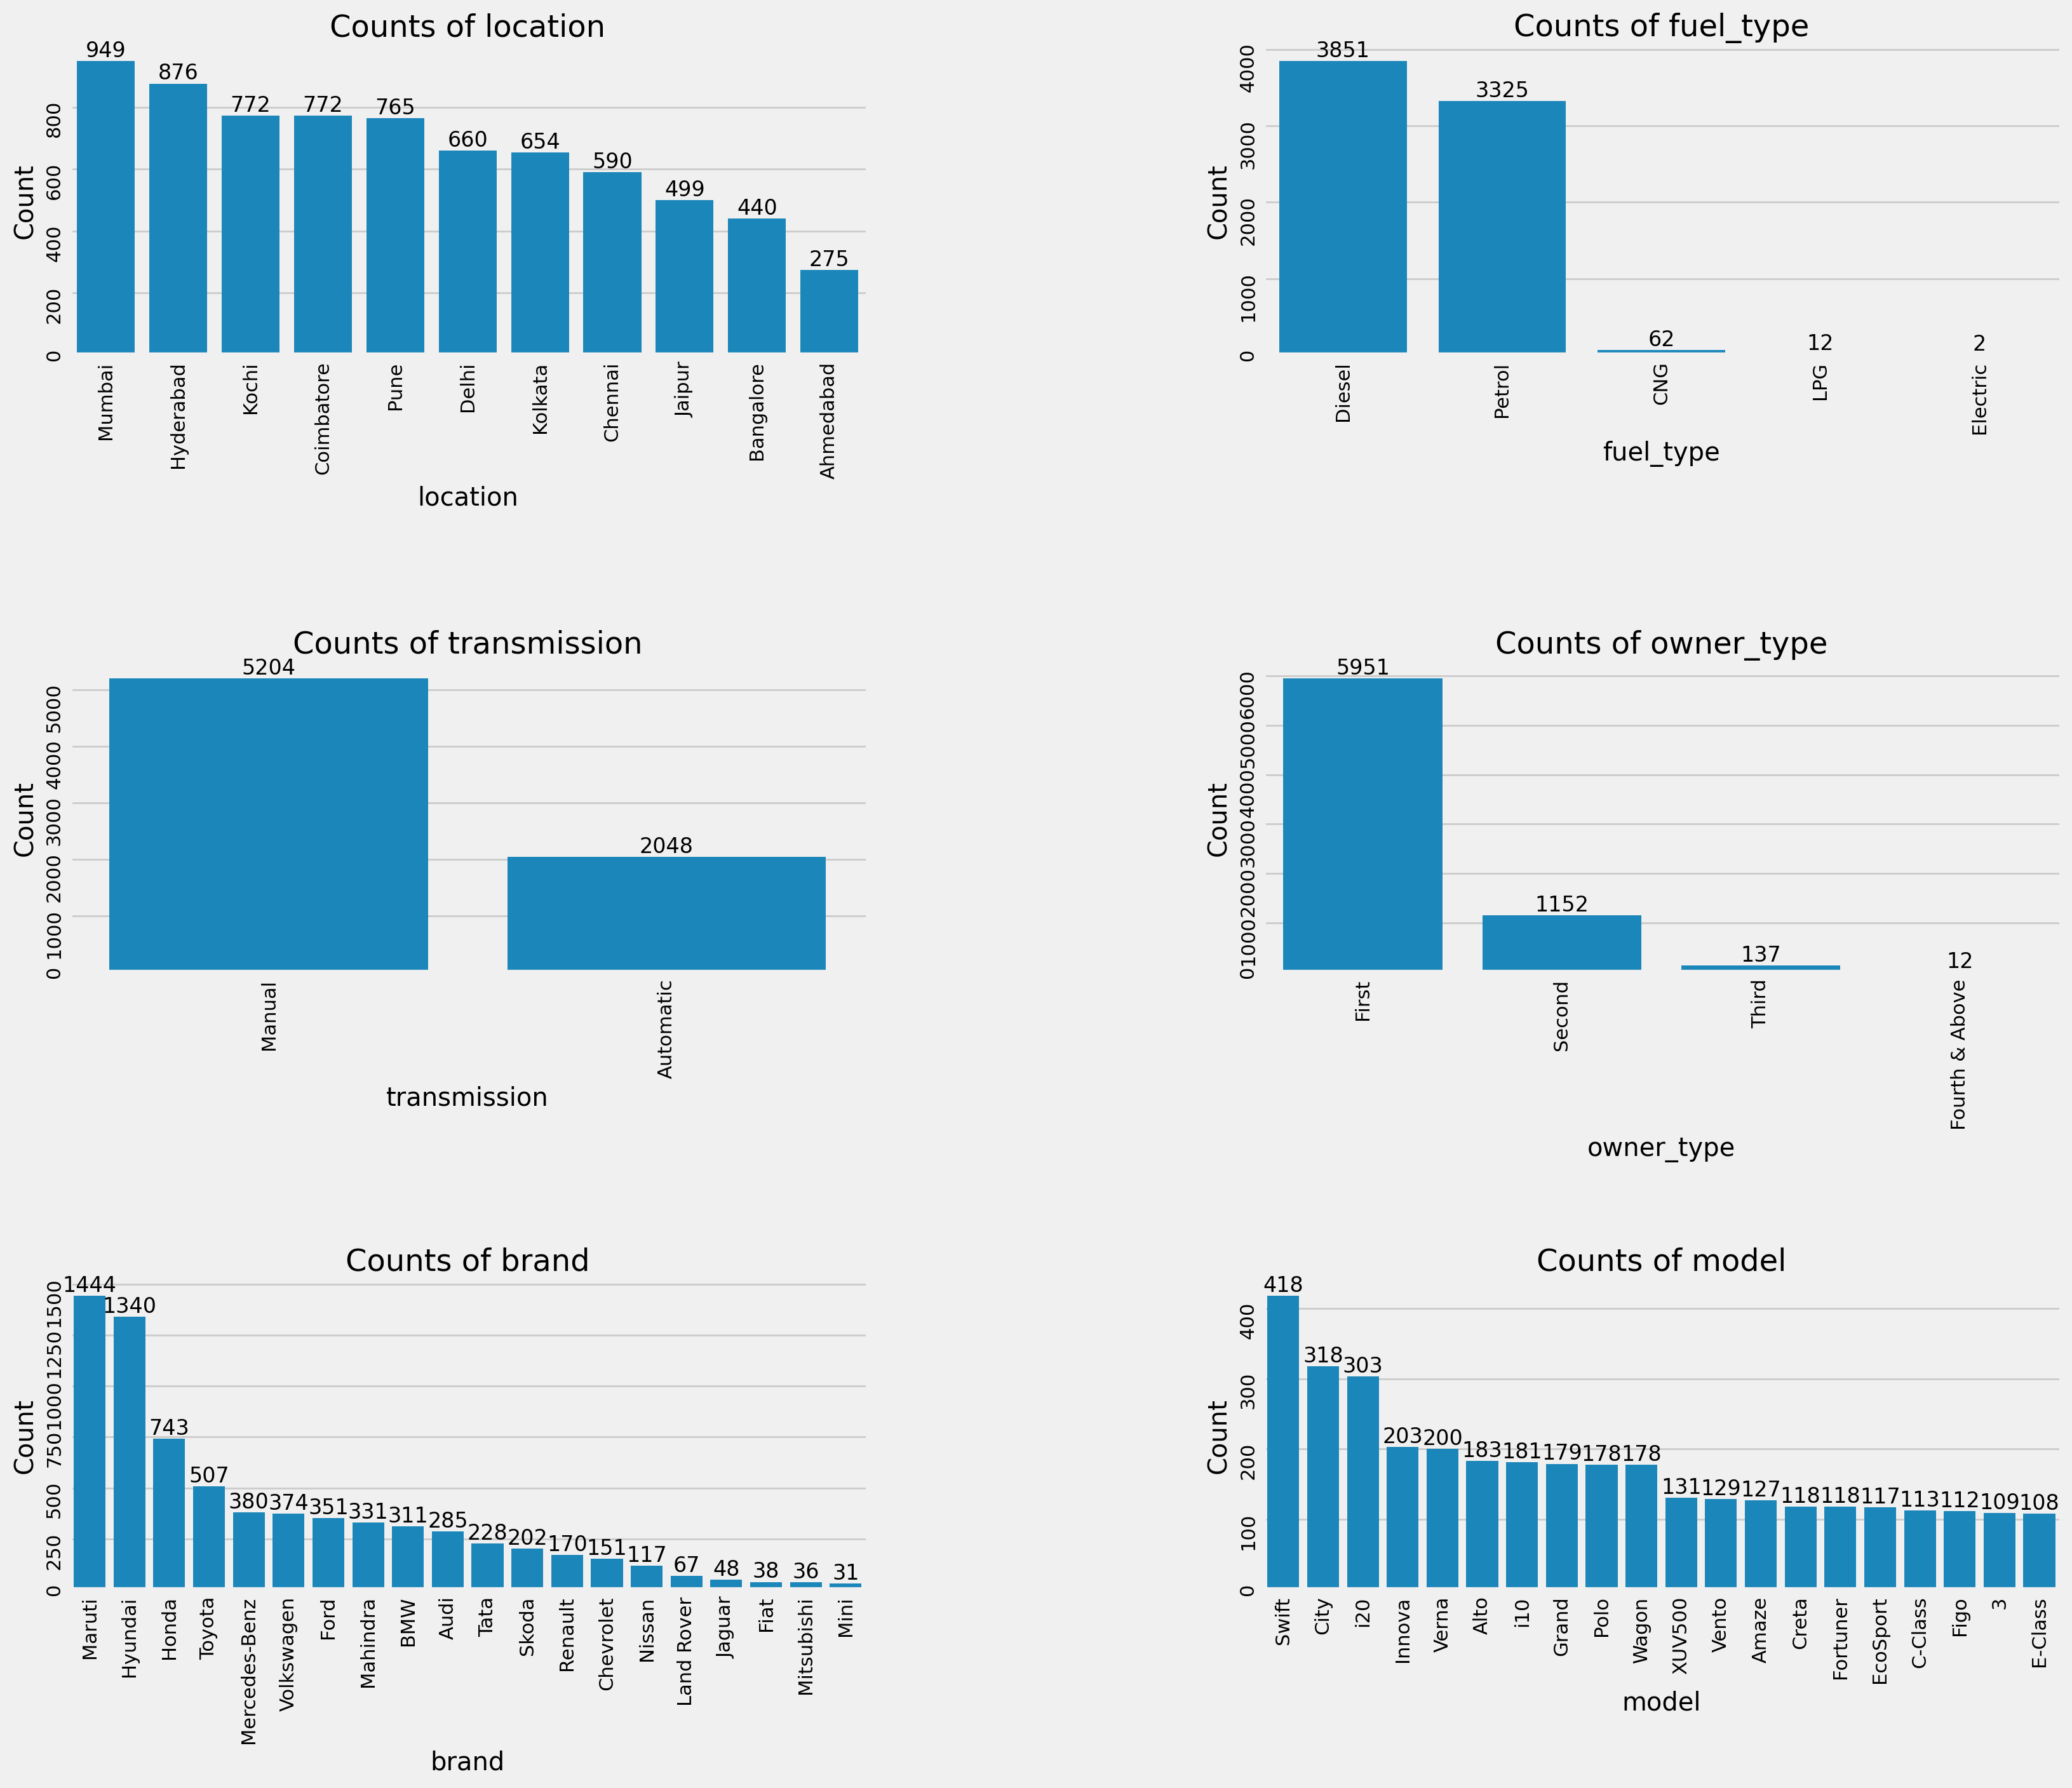

In [14]:
fig, axes = plt.subplots(3, 2, figsize = (18, 15))
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
for i, col in zip(range(6), categorical_cols):
    sns.countplot(ax=axes[i//2, i%2], x=col, data=data, order=data[col].value_counts().head(20).index)    
    axes[i//2, i%2].bar_label(axes[i//2, i%2].containers[0])
    axes[i//2, i%2].tick_params(labelrotation=90)
    axes[i//2, i%2].set_title(f'Counts of {col}')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Count')
    

<span style="color:blue">_# TODO: Create a new variable previous_owners from owner_type._</span>\
<span style="color:blue">_# TODO: Remove Electric cars from the dataset such as 2 cars are not enough to predict the price accurately._</span>

### Bivariate Analysis <a name='bivariate-analysis'></a>

<Figure size 1300x1700 with 0 Axes>

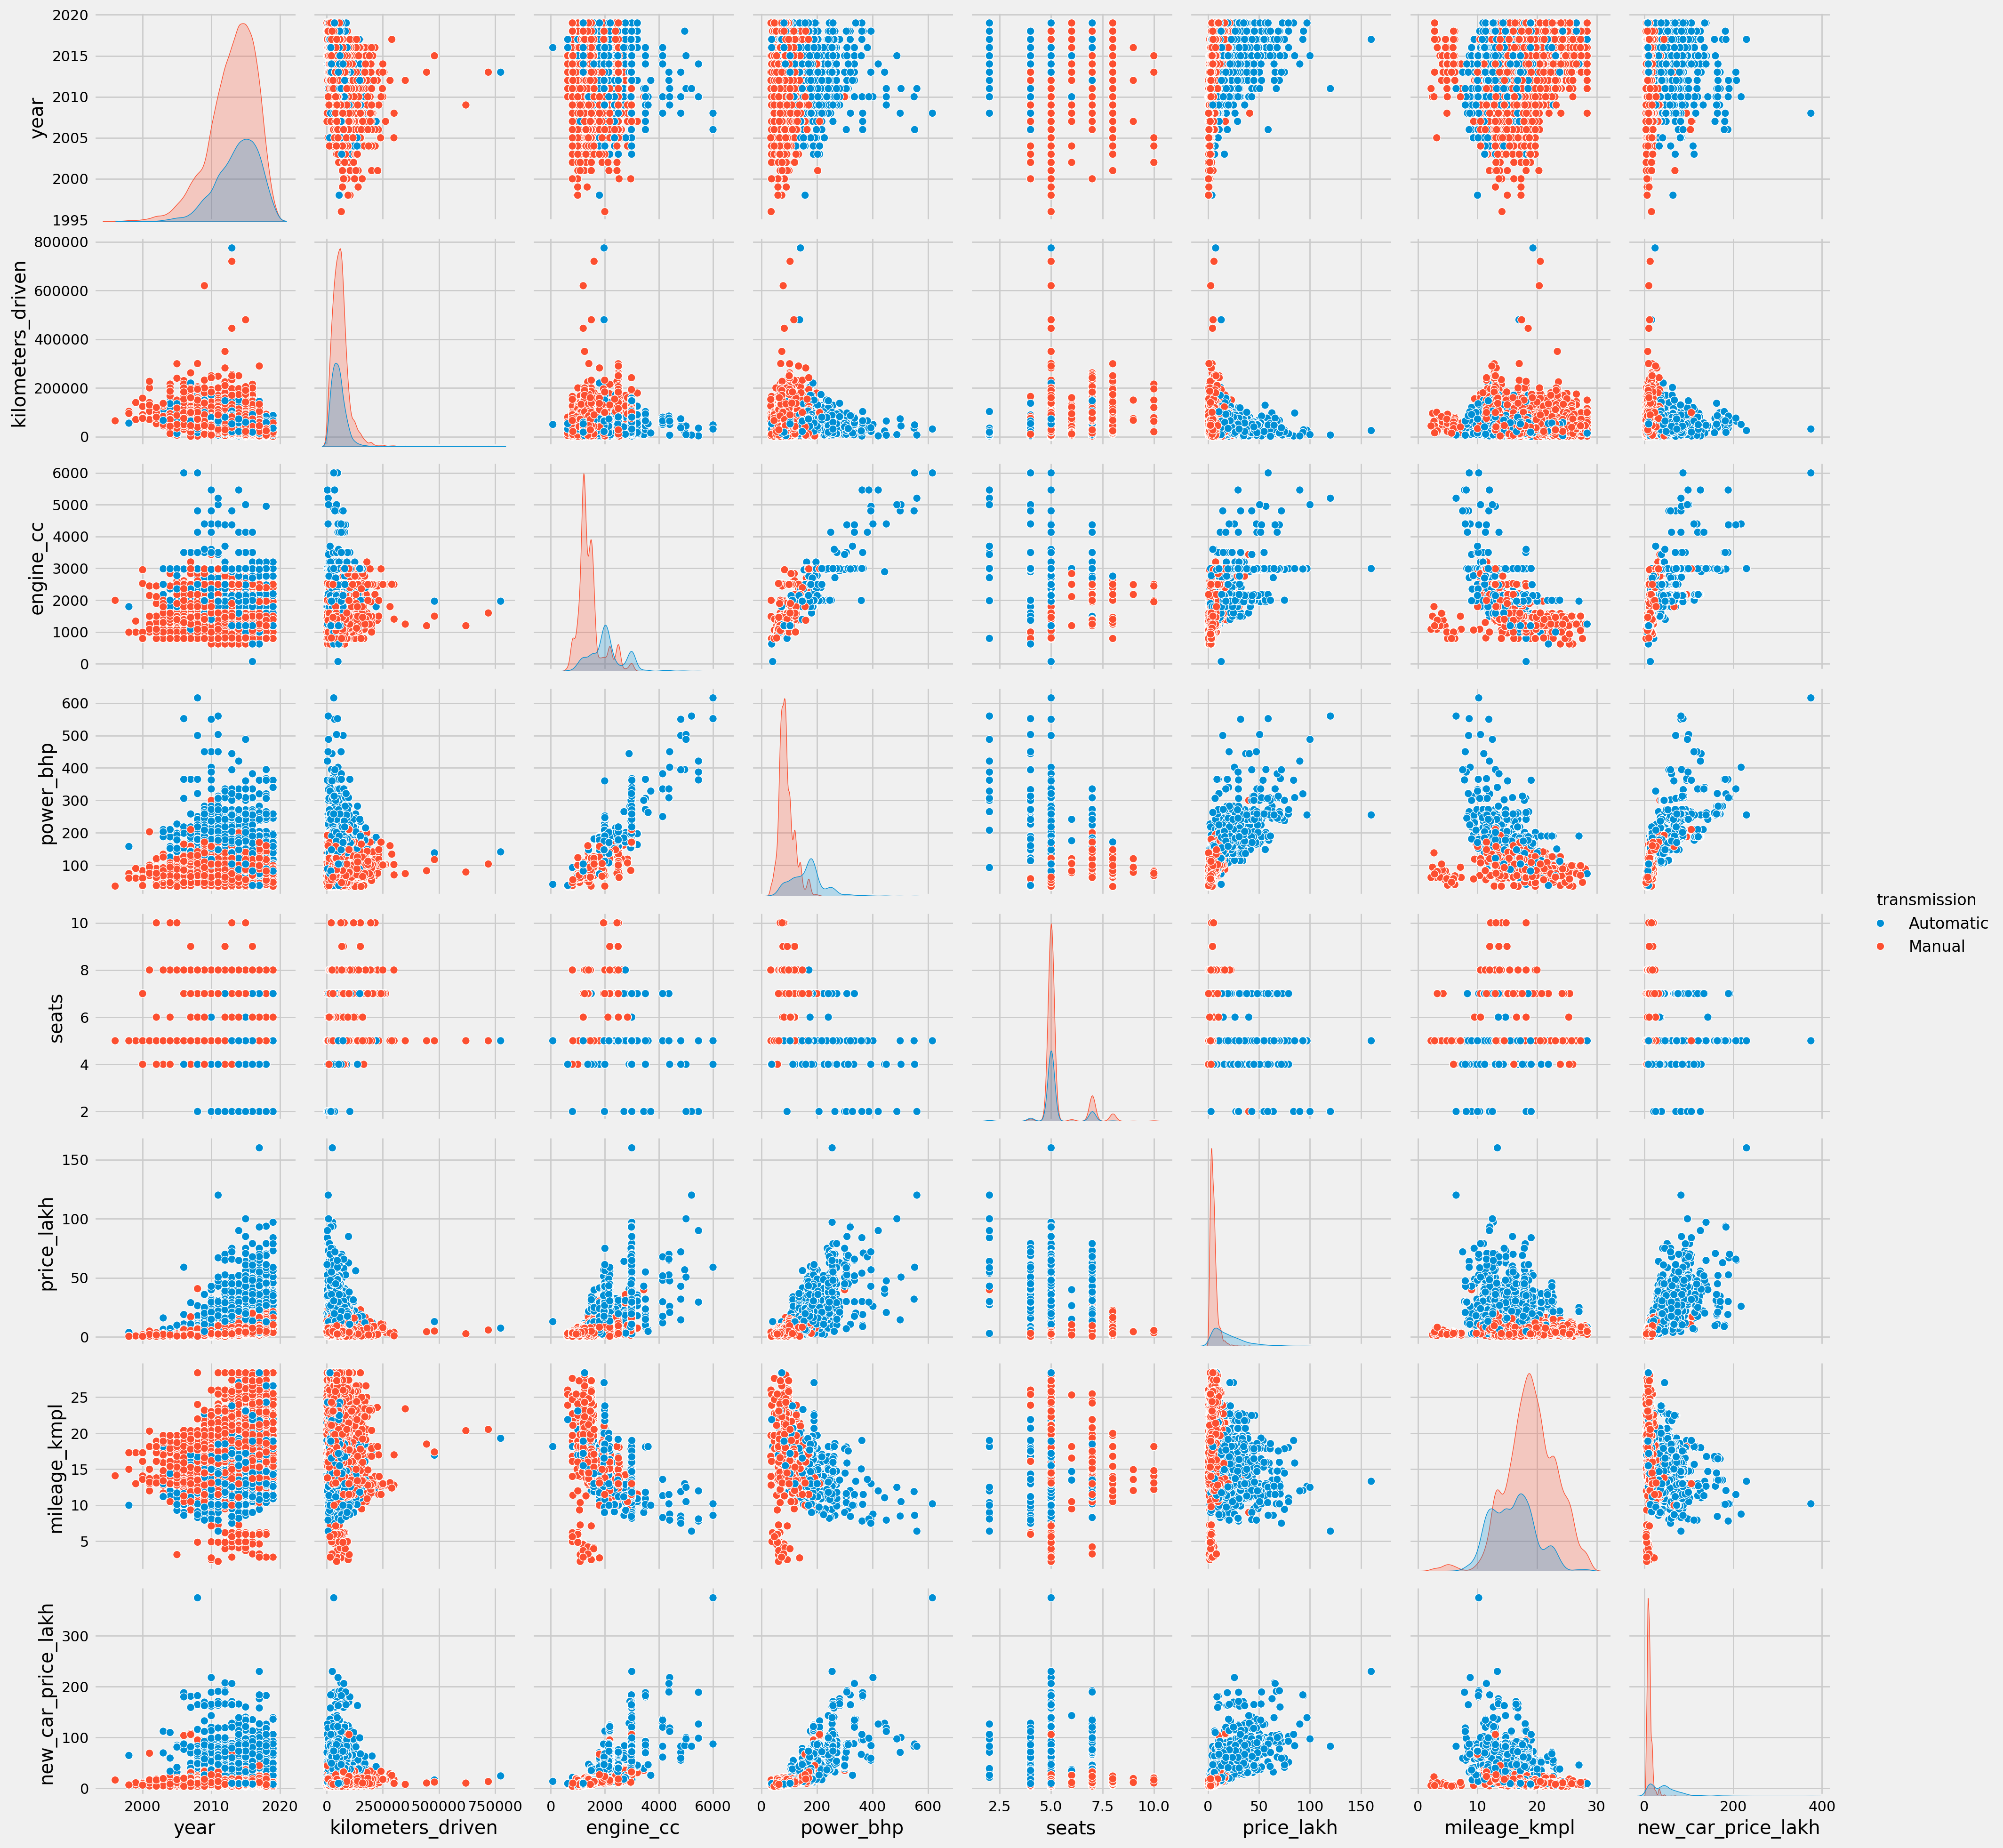

In [15]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data, diag_kind='kde', hue='transmission')
plt.show()

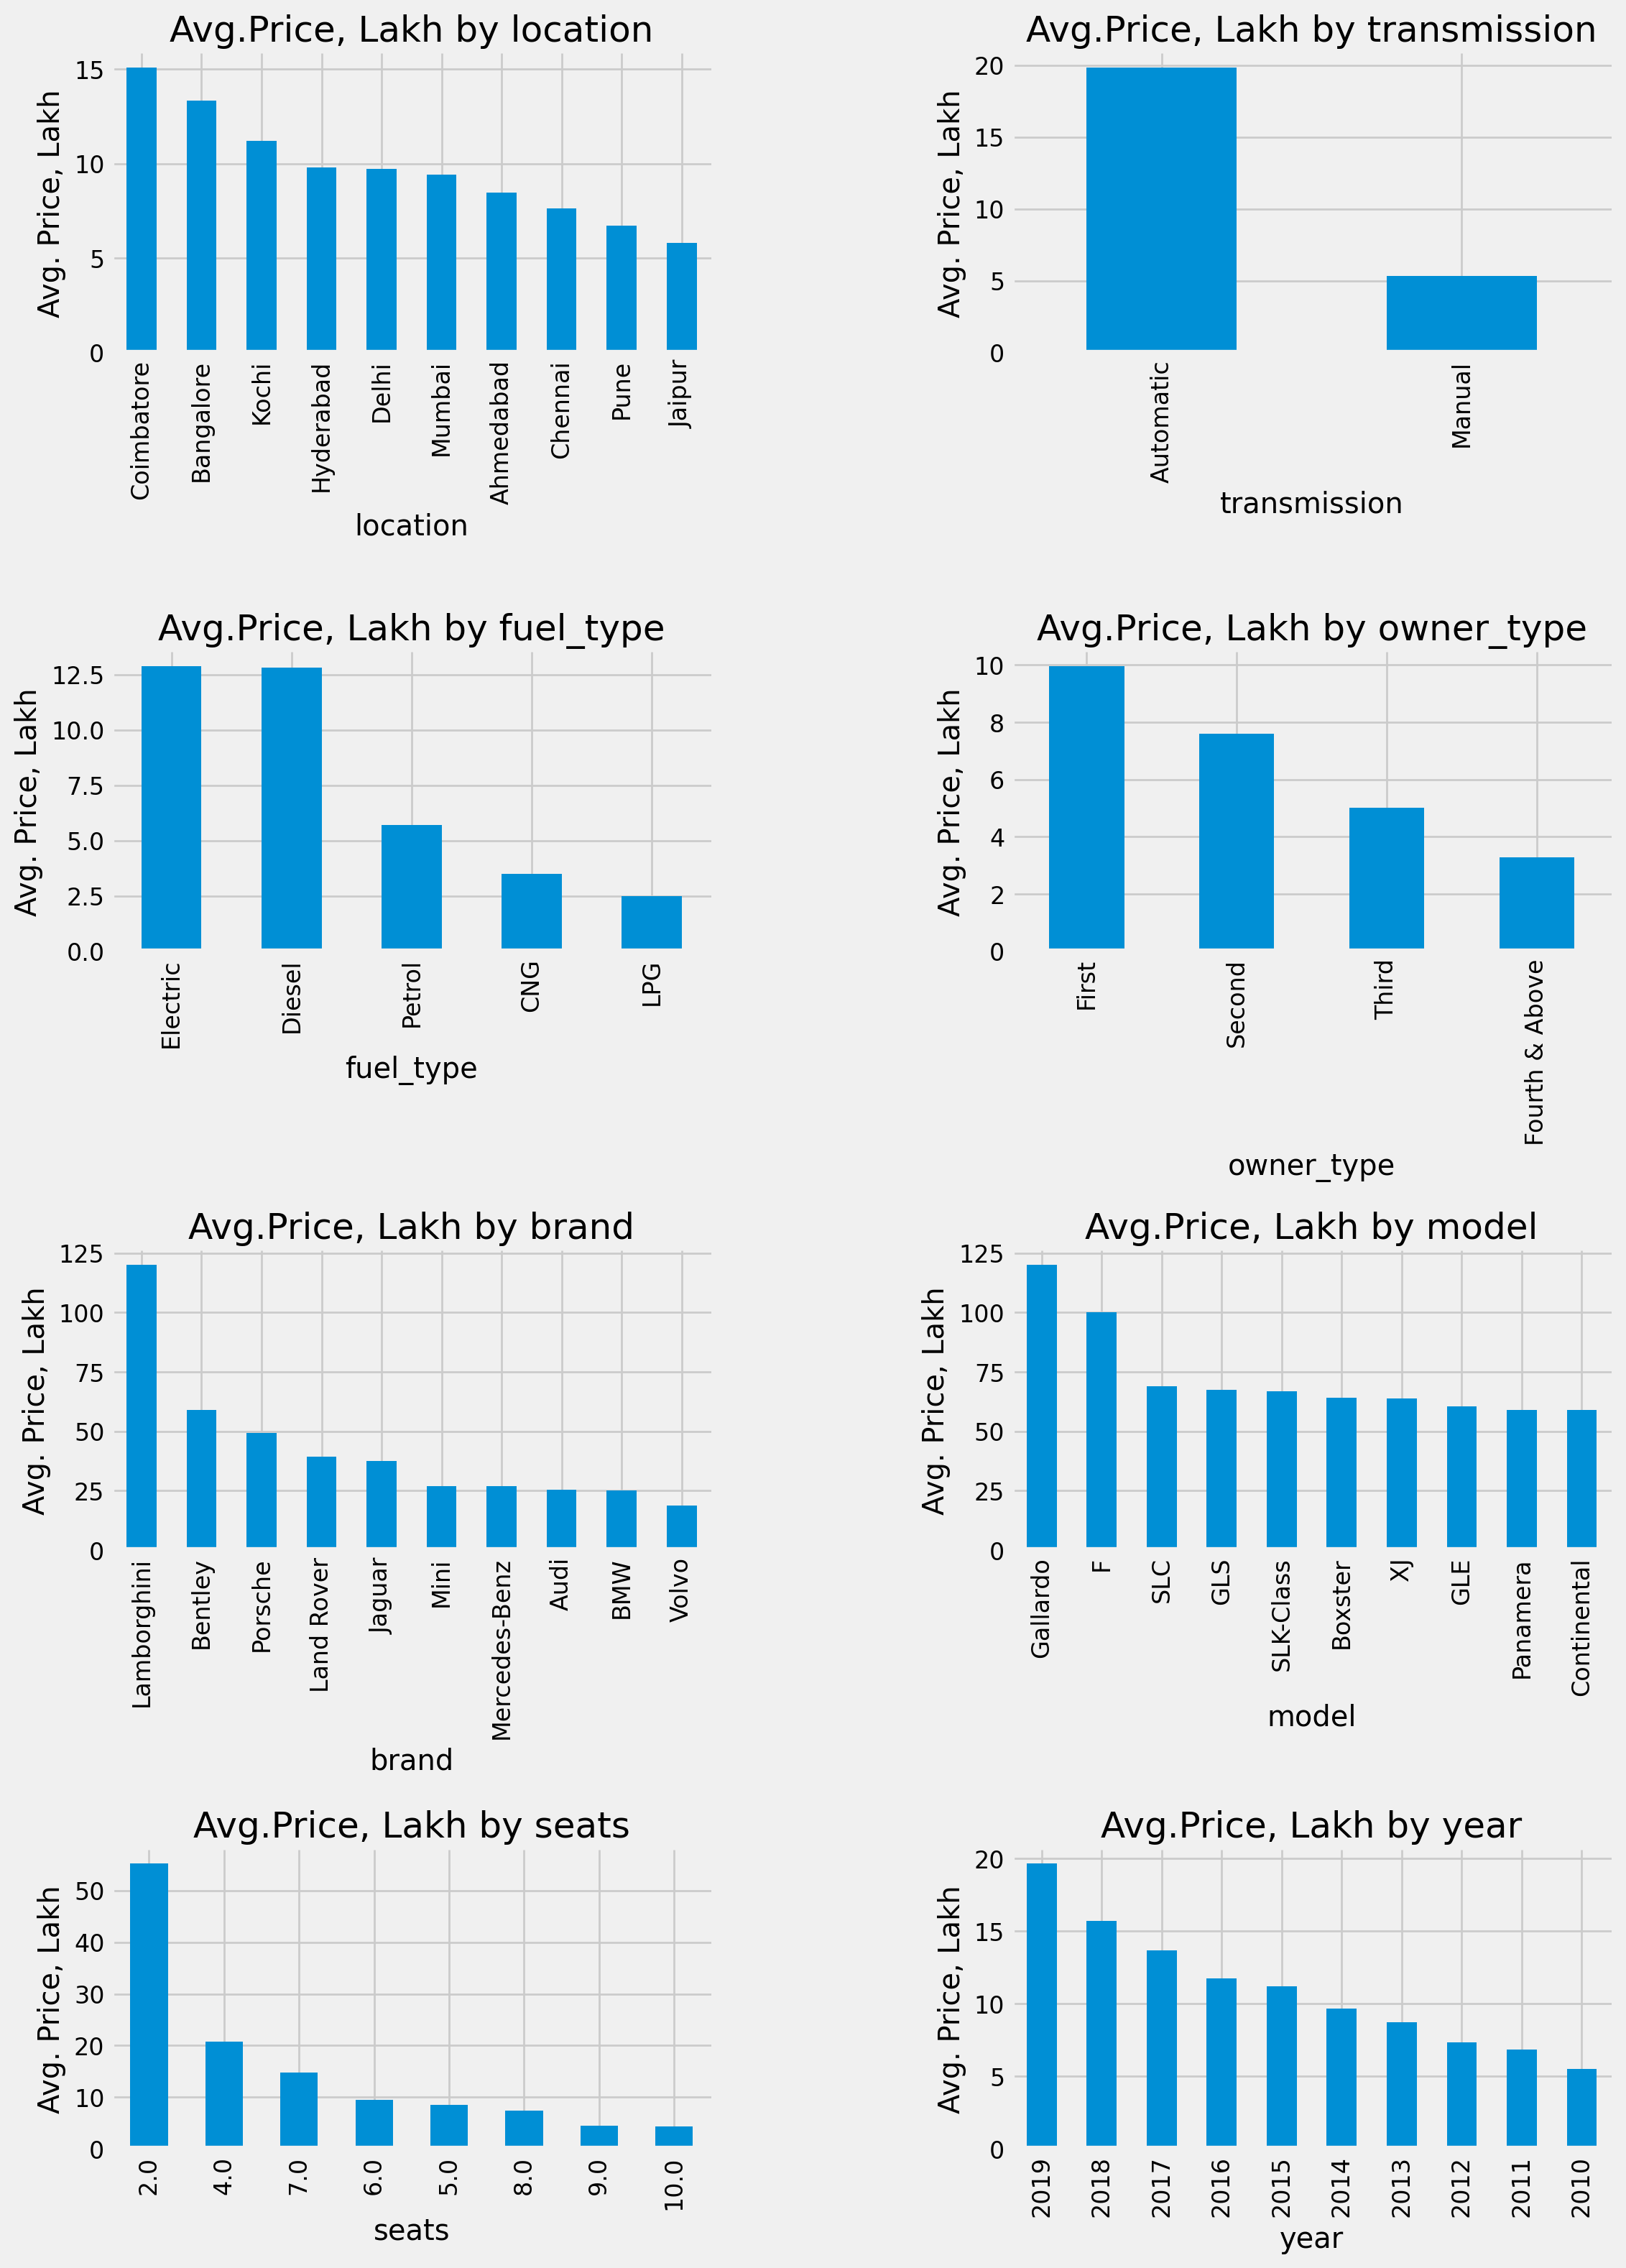

In [16]:
fir, axarr = plt.subplots(4, 2, figsize=(12, 18))
for i, column in zip(range(8), ['location', 'transmission', 'fuel_type', \
                                'owner_type', 'brand', 'model', 'seats', \
                                'year']):
    ax = axarr[i//2][i%2]
    data.groupby(column, observed=True)['price_lakh'].mean().sort_values(ascending=False).head(10).plot.bar(ax=ax, fontsize=12)
    ax.set_title(f"Avg.Price, Lakh by {column}", fontsize=18)
    ax.set_ylabel('Avg. Price, Lakh')

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [17]:
def boxplot(by):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=by, y='price_lakh', data=data, hue=by)
    plt.title(f"Price, Lakh distribution by {by}", fontsize=18)
    plt.ylabel('Price, Lakh')
    plt.show()

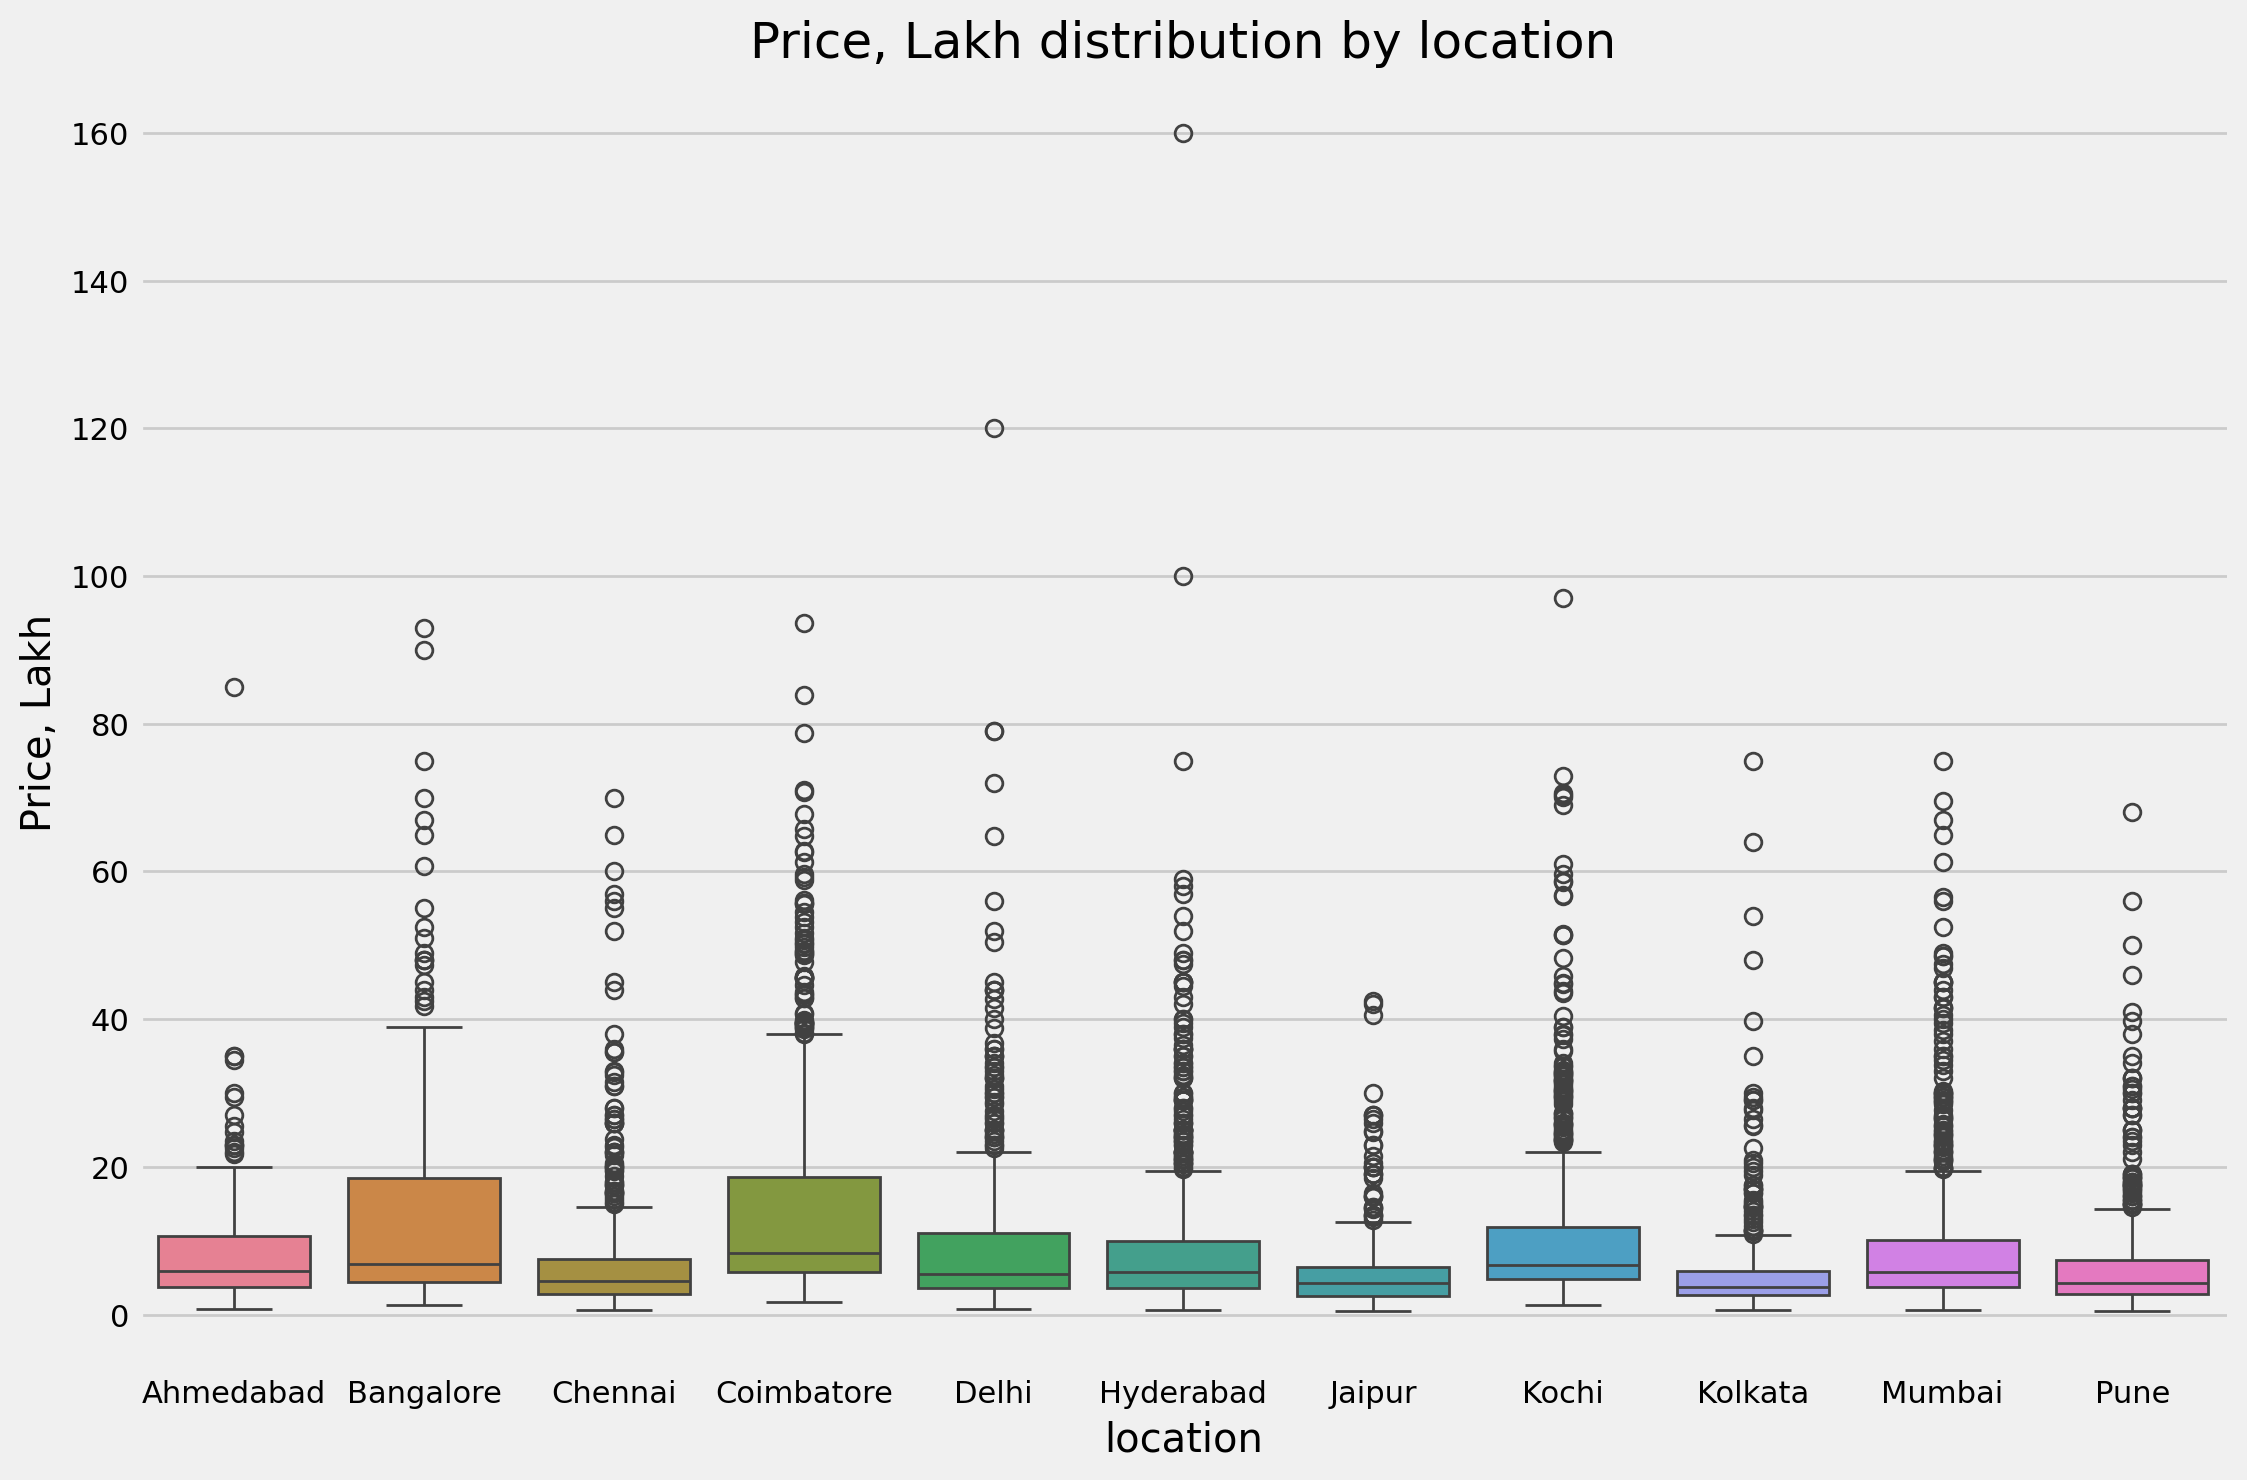

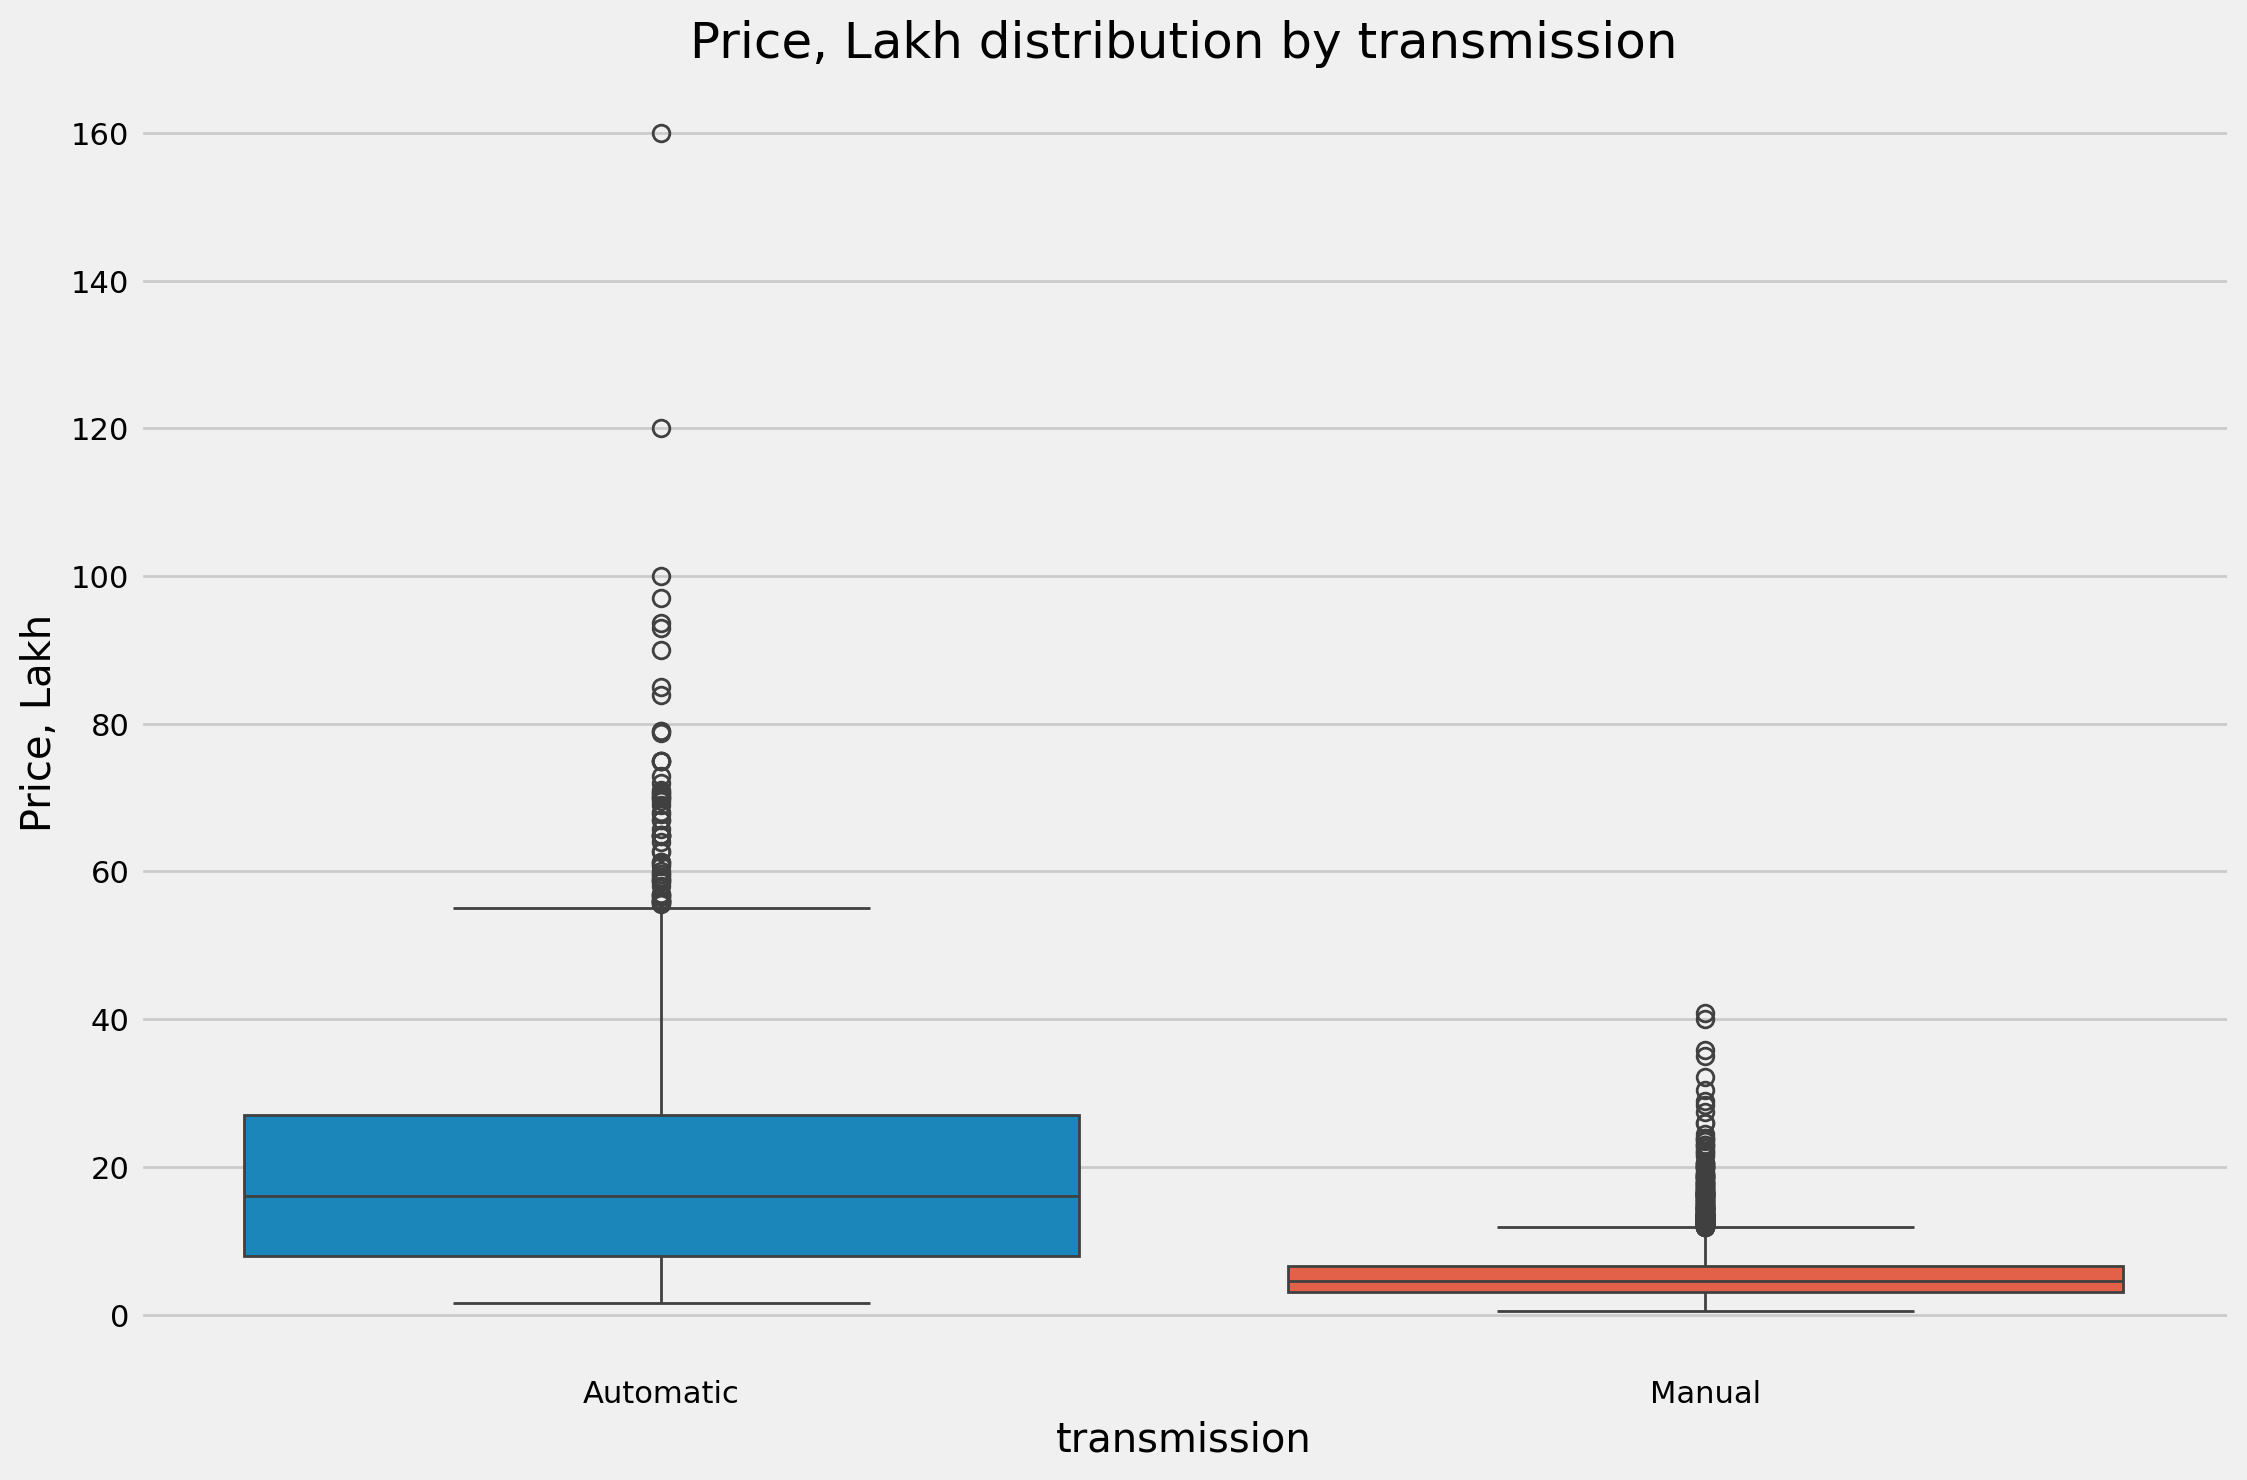

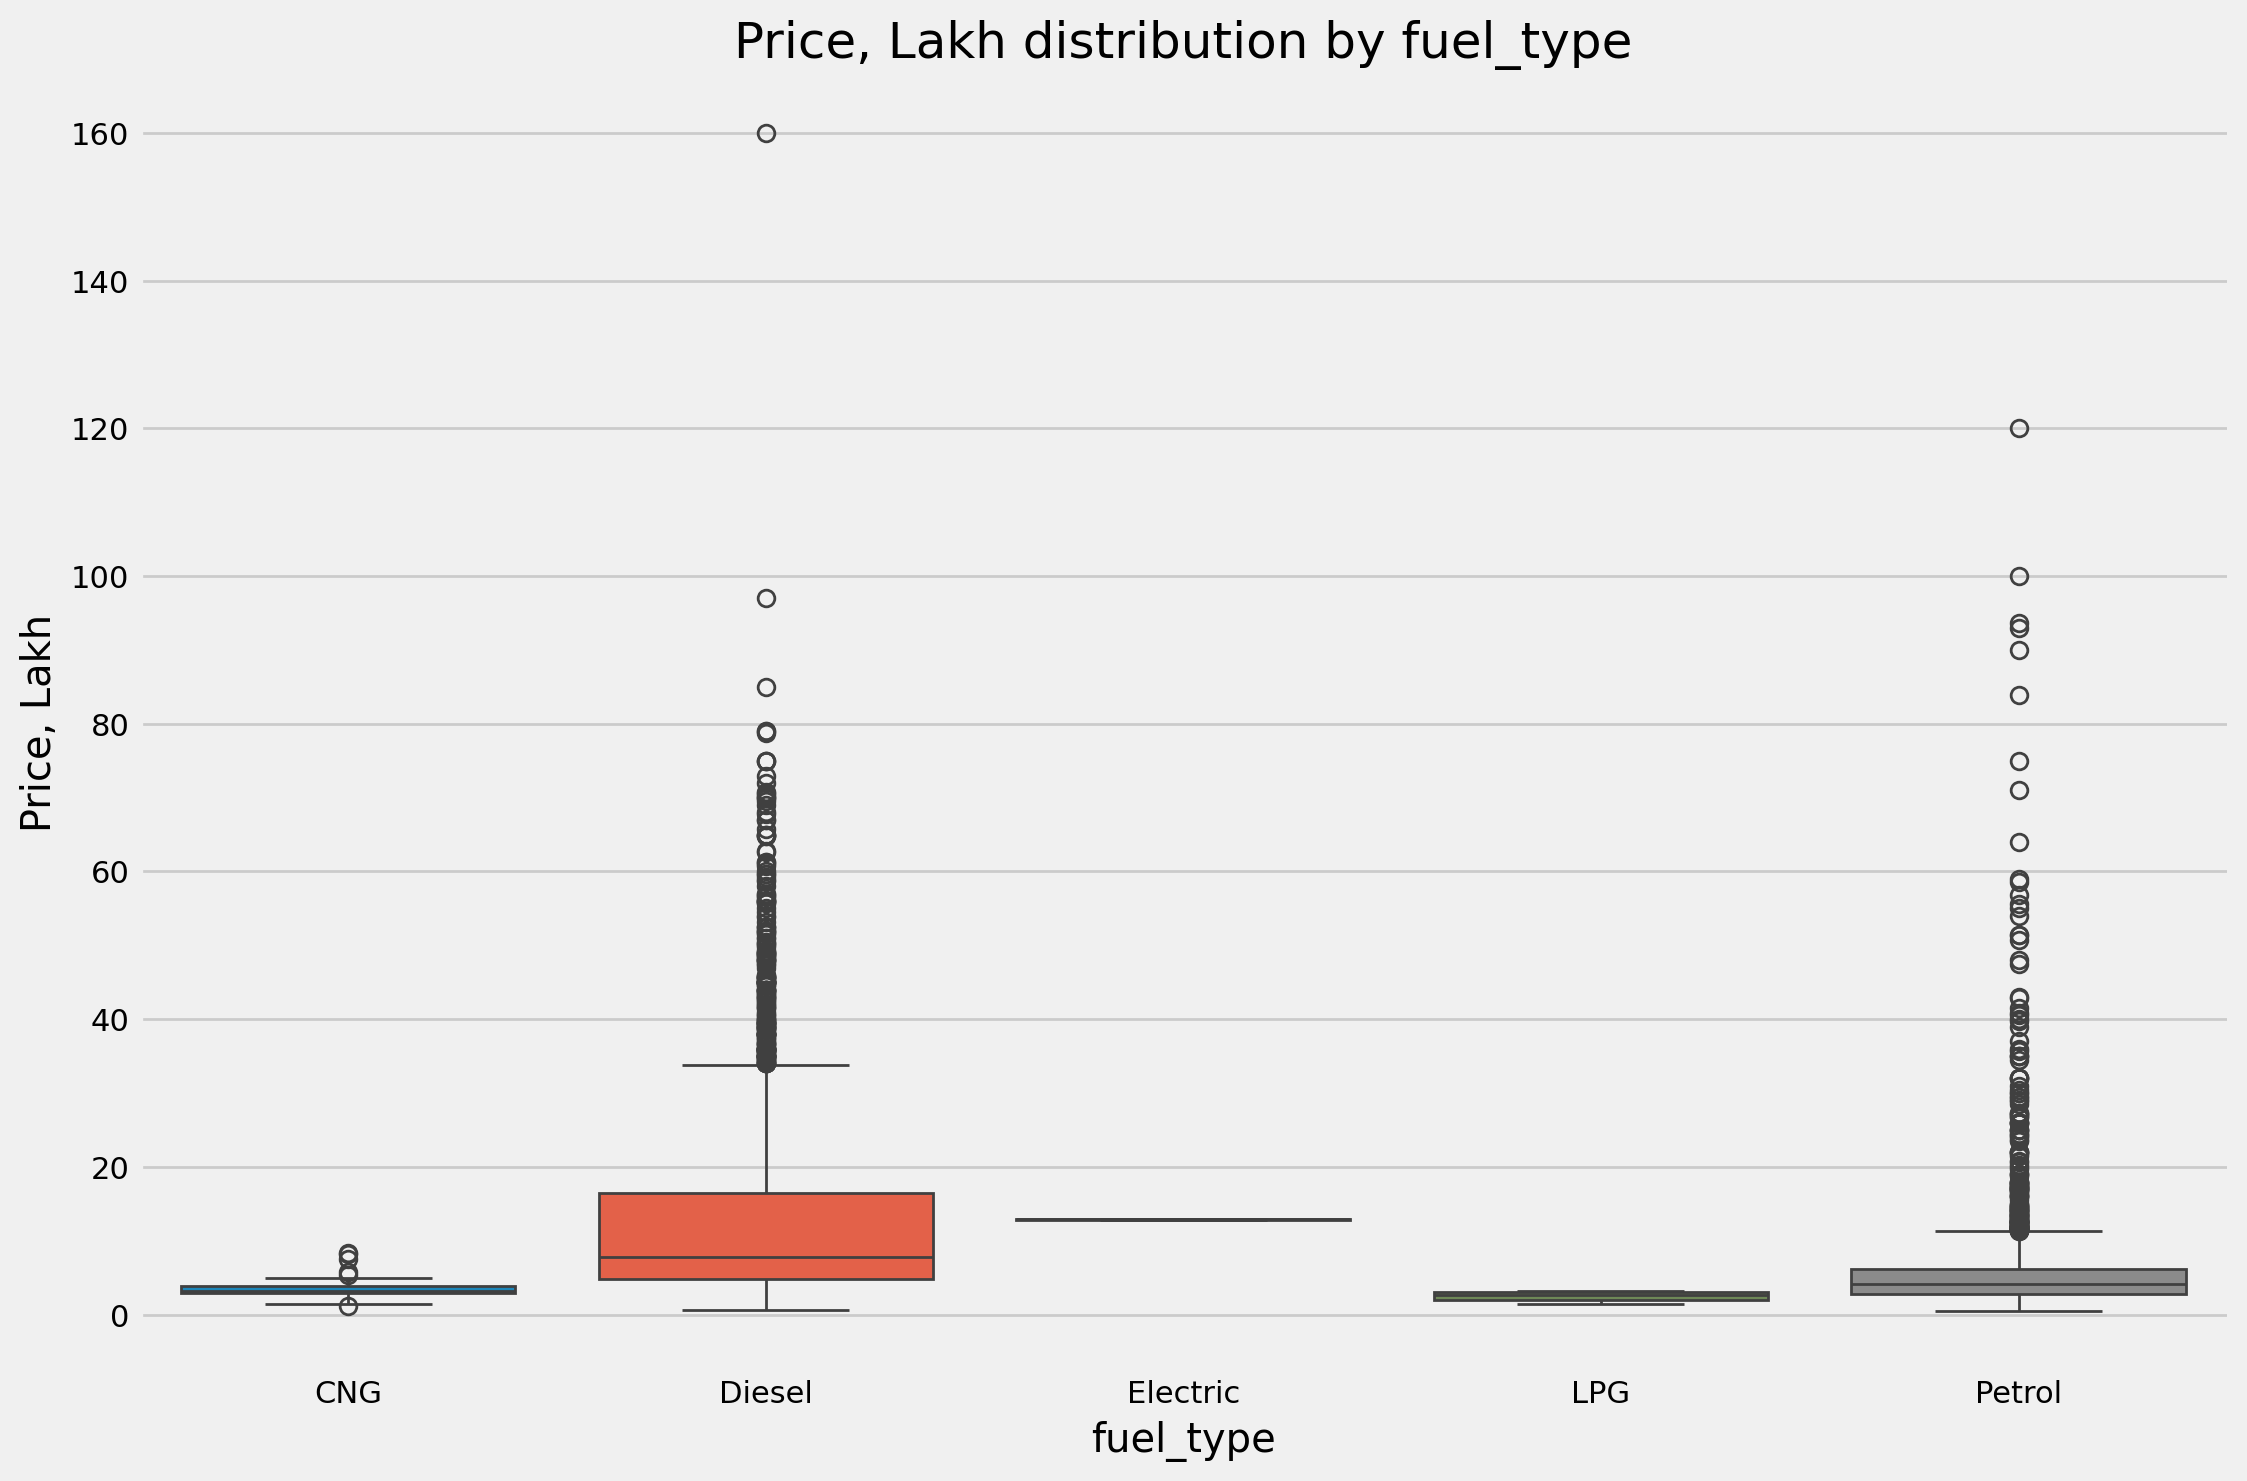

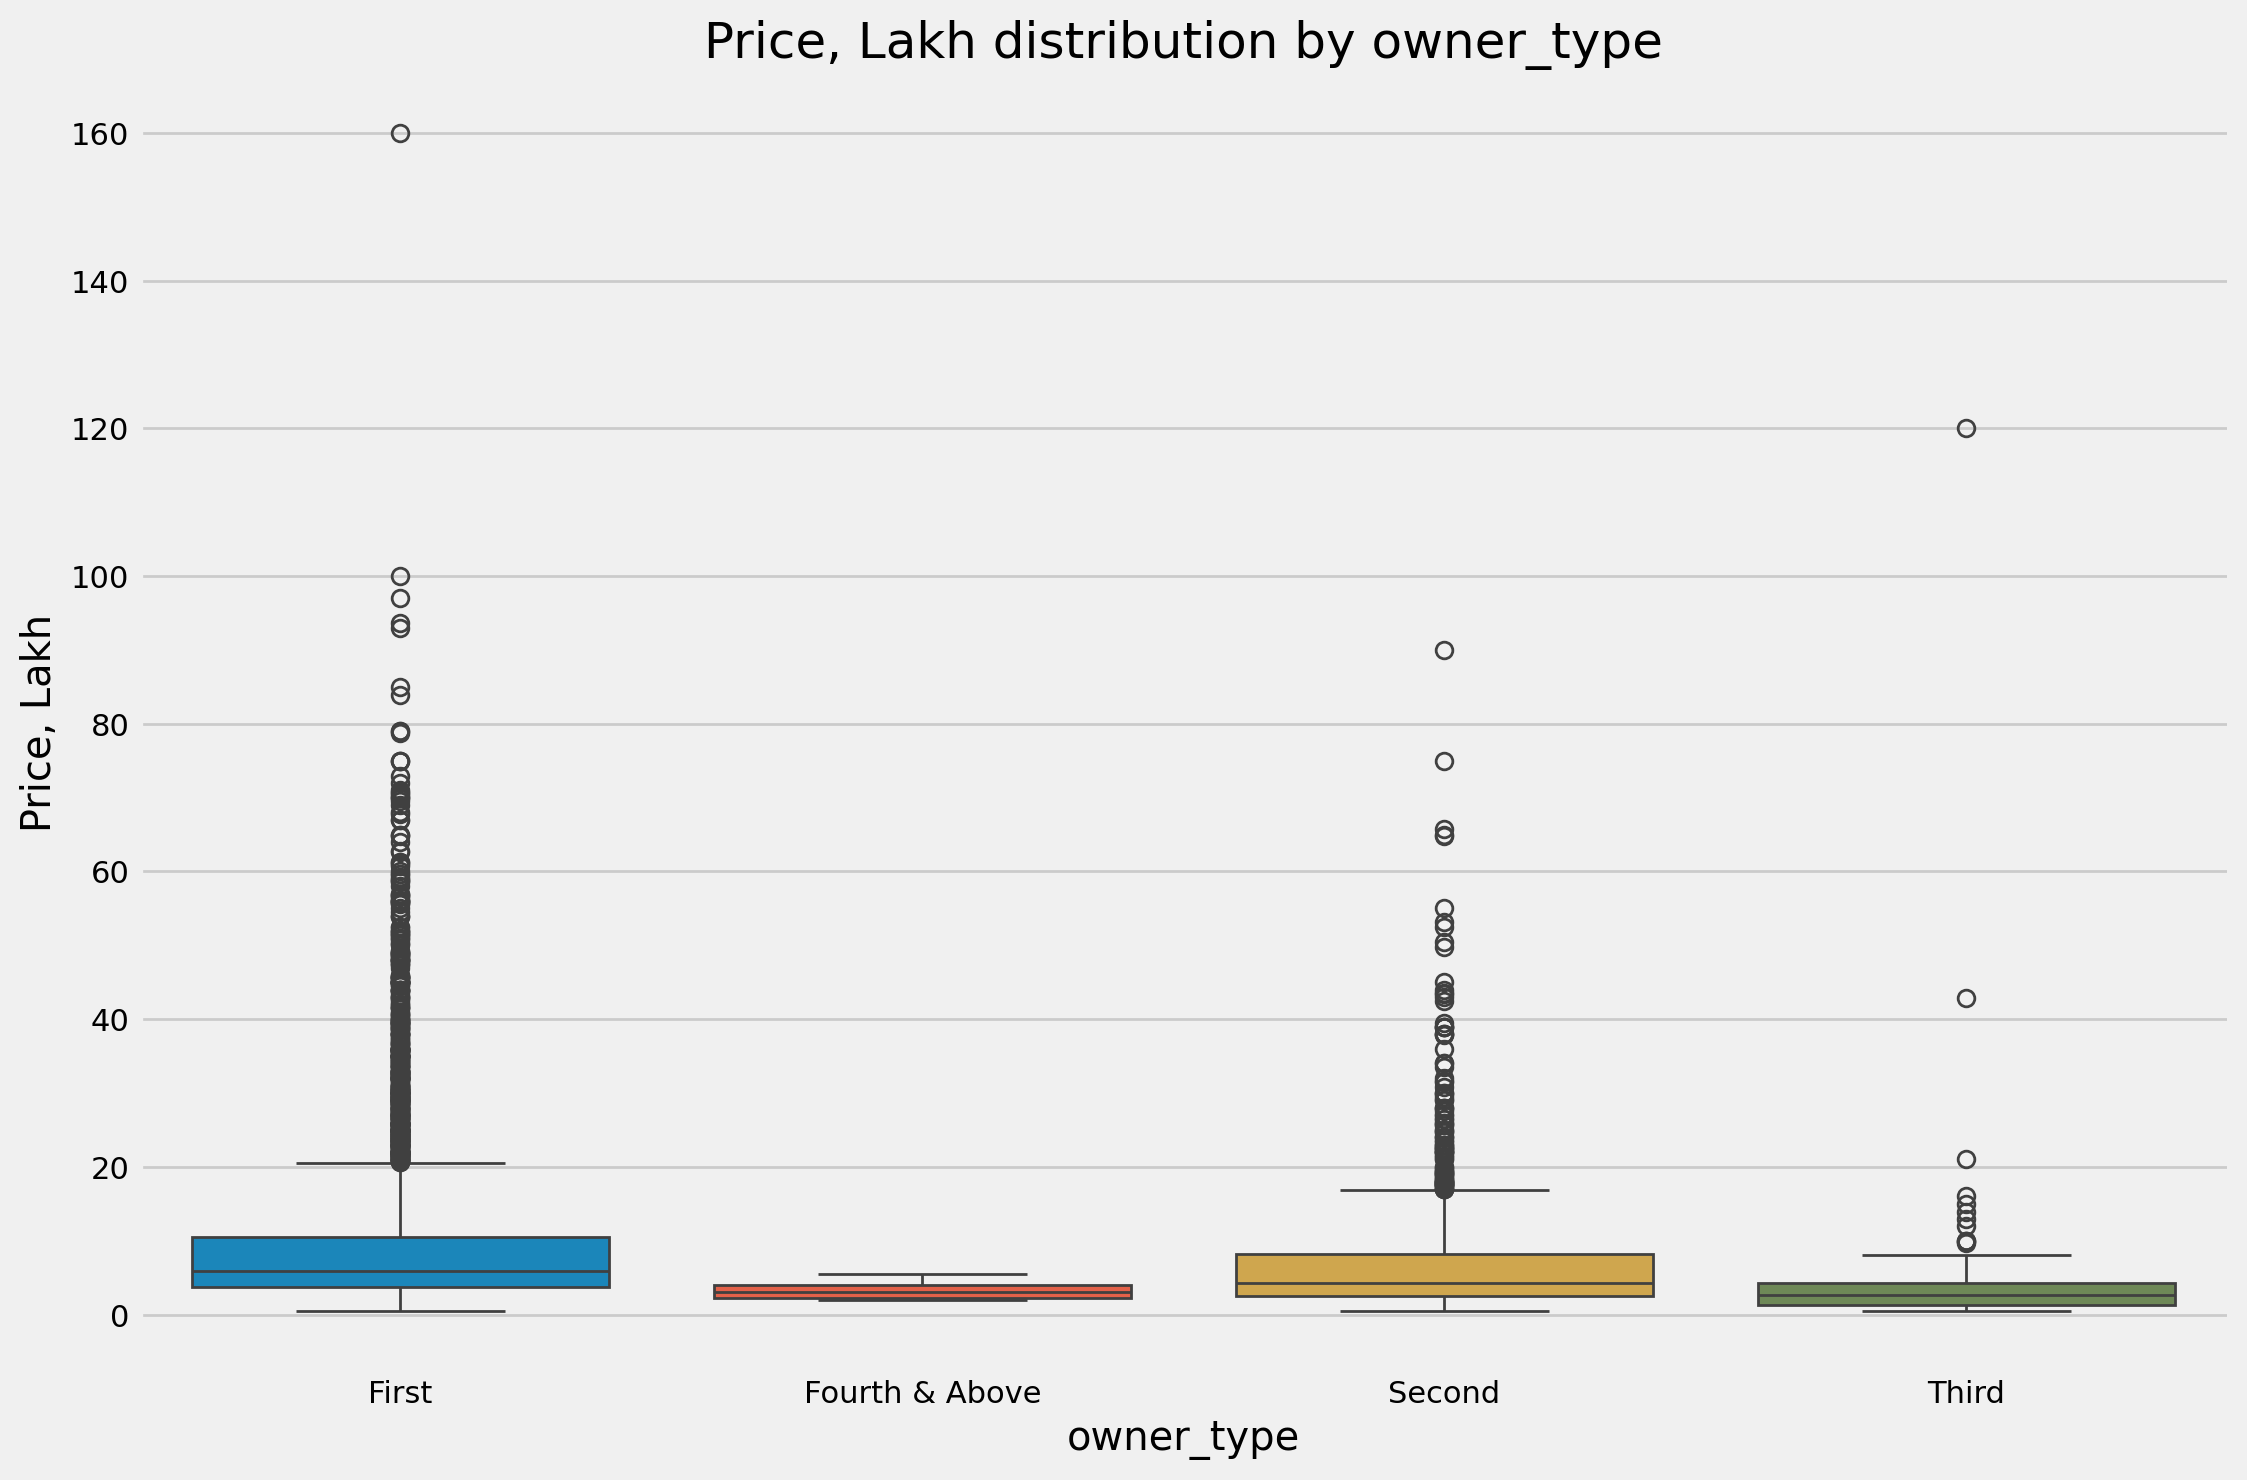

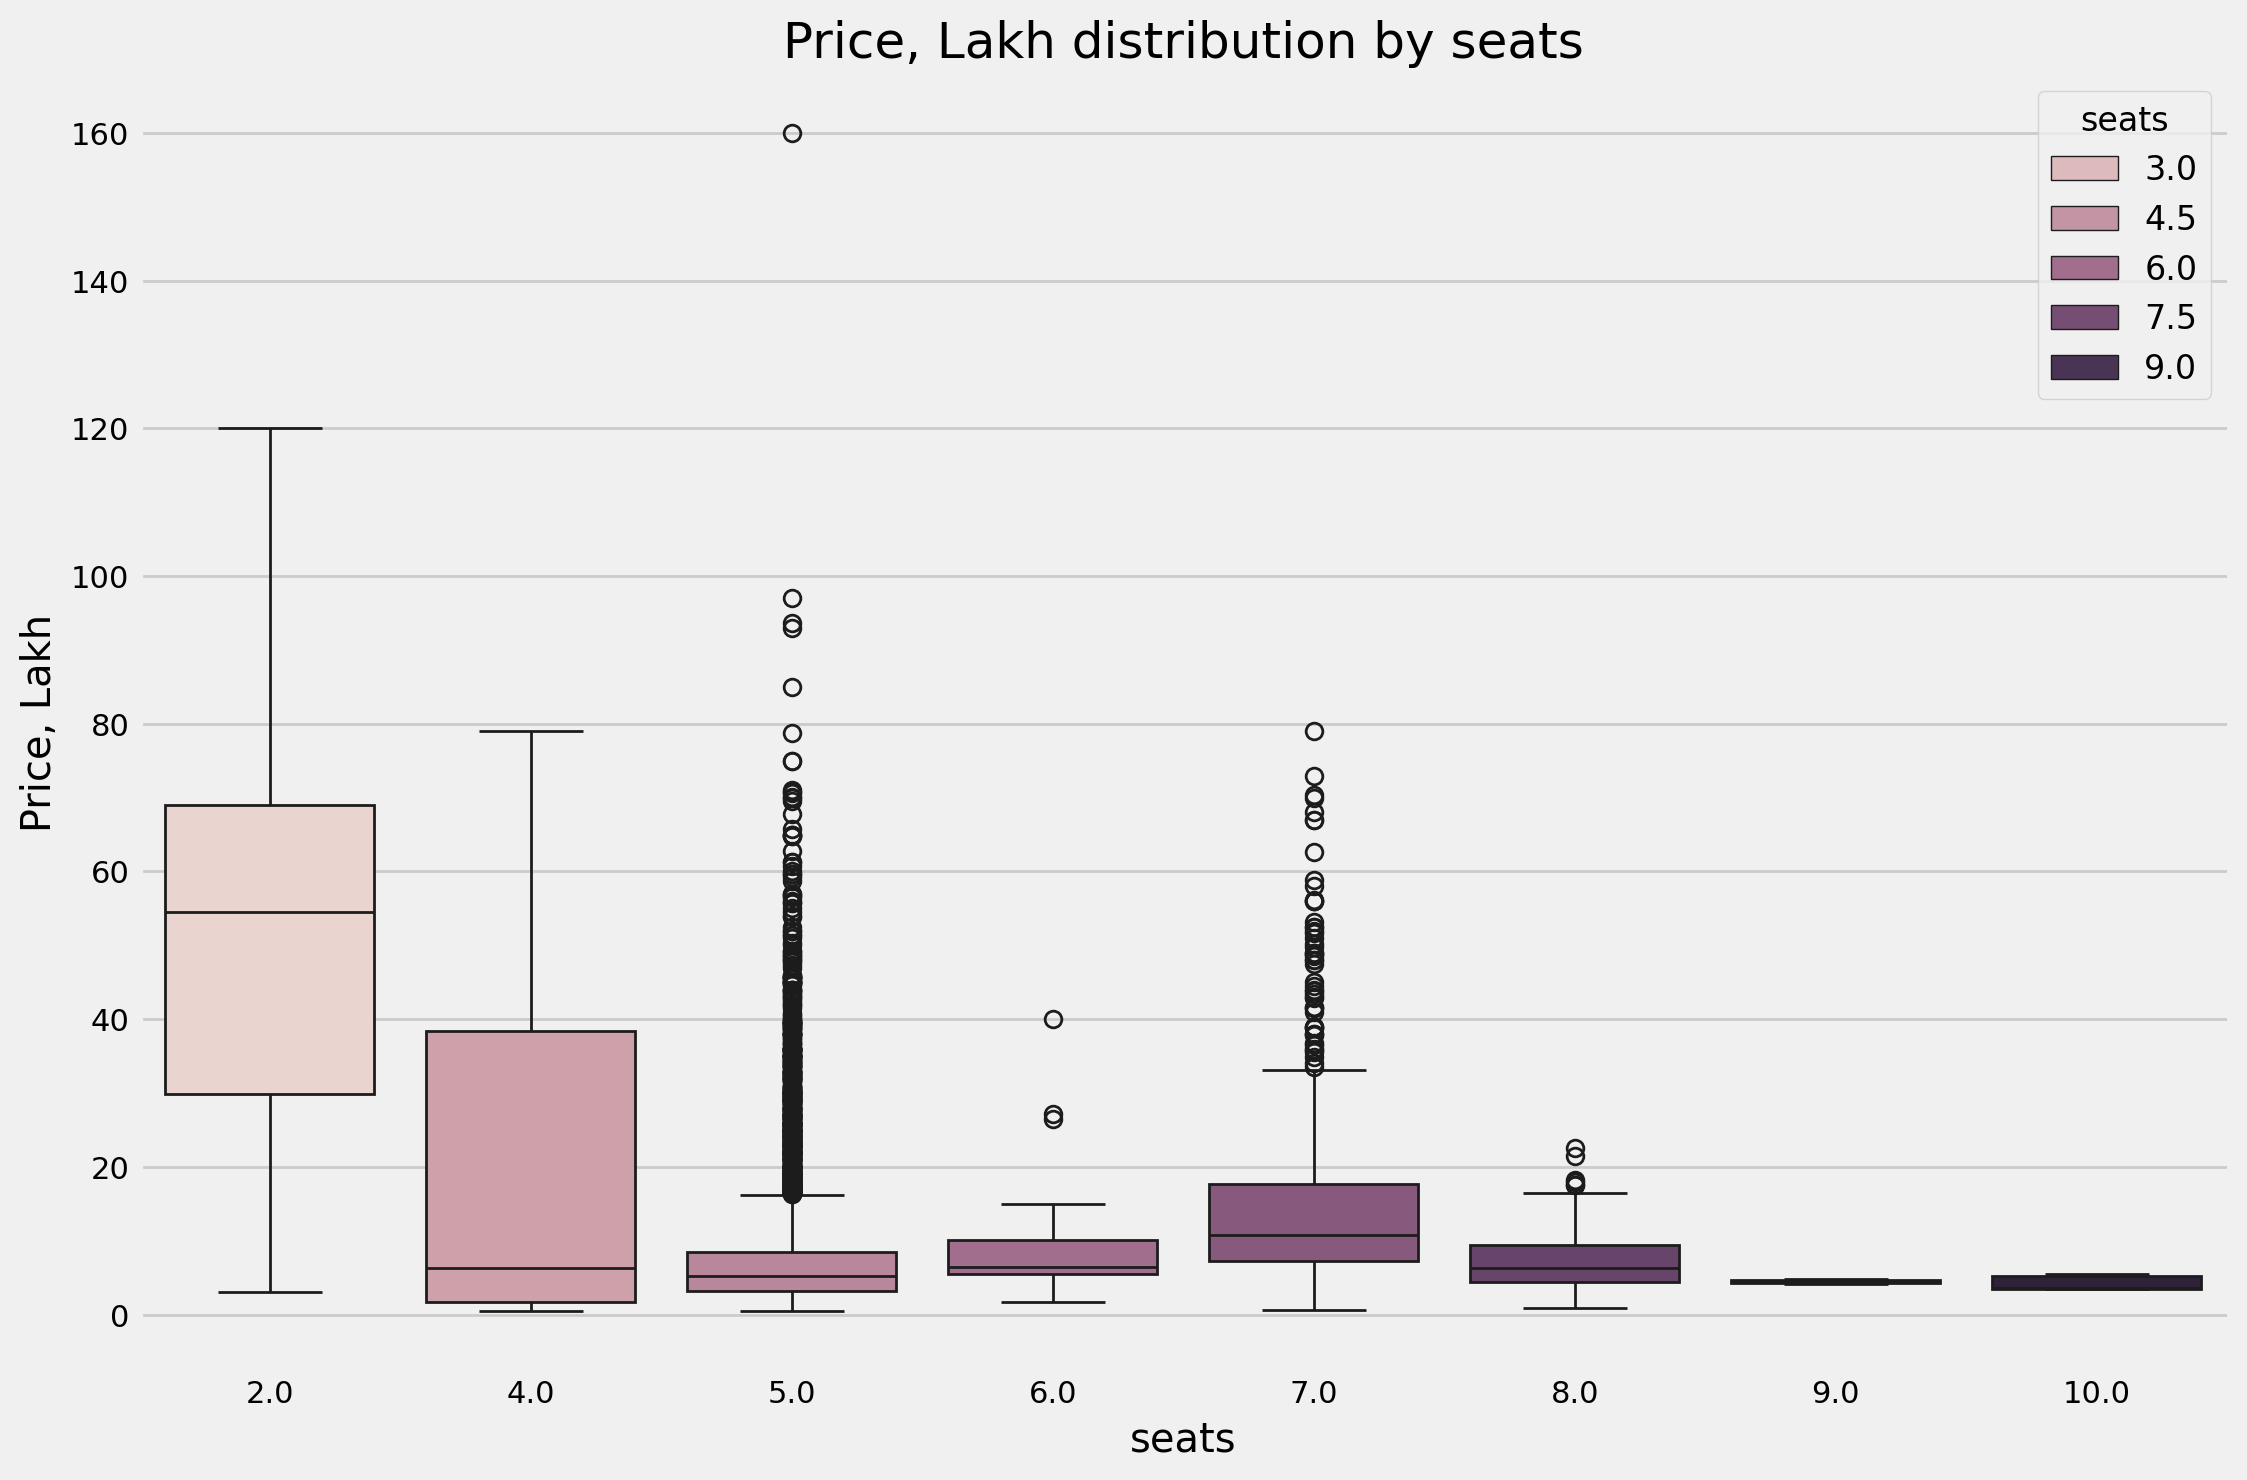

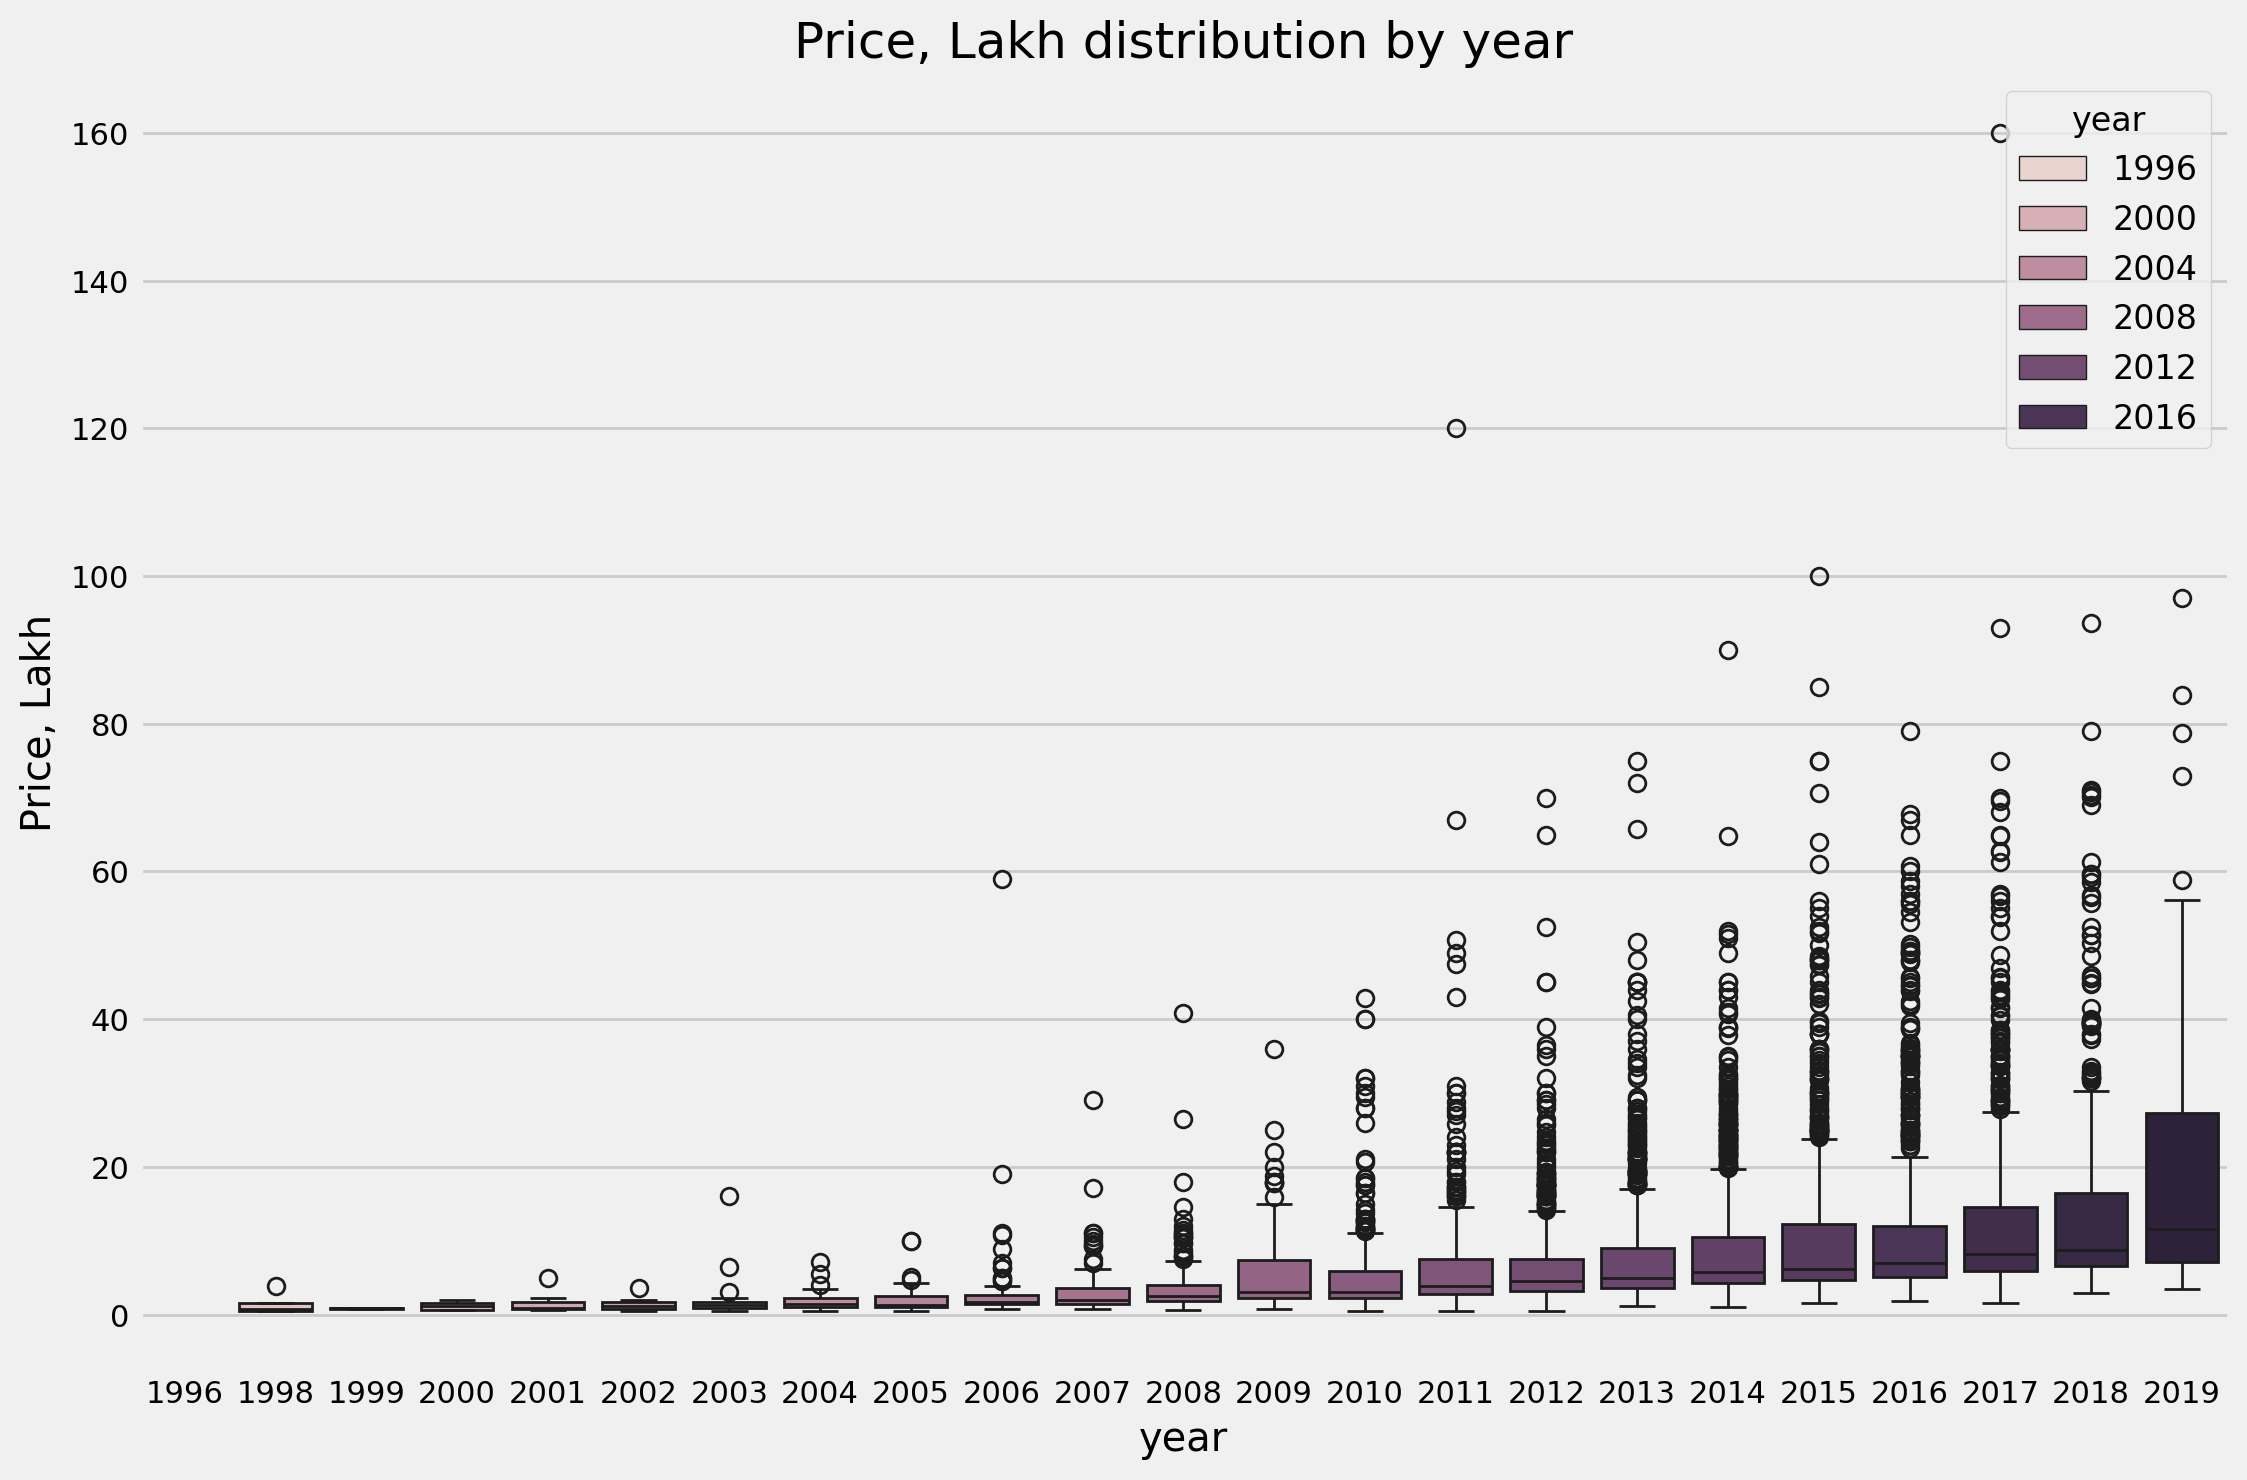

In [18]:
for i, column in zip(range(6), ['location', 'transmission', 'fuel_type', \
                                'owner_type', 'seats', 'year']):
    boxplot(by=column)

In [19]:
numeric_cols

Index(['year', 'kilometers_driven', 'engine_cc', 'power_bhp', 'seats',
       'price_lakh', 'mileage_kmpl', 'new_car_price_lakh'],
      dtype='object')

### Multivariate Analysis <a name='multivariate-analysis'></a>

In [20]:
data[numeric_cols].corr()

year  kilometers_driven  engine_cc  power_bhp   seats  \
year                1.0000            -0.4495    -0.0525     0.0305  0.0106   
kilometers_driven  -0.4495             1.0000     0.1579    -0.0039  0.2126   
engine_cc          -0.0525             0.1579     1.0000     0.8596  0.4026   
power_bhp           0.0305            -0.0039     0.8596     1.0000  0.0937   
seats               0.0106             0.2126     0.4026     0.0937  1.0000   
price_lakh          0.3055            -0.1686     0.6593     0.7748  0.0541   
mileage_kmpl        0.2820            -0.1345    -0.5779    -0.4862 -0.3187   
new_car_price_lakh  0.0111            -0.0103     0.7125     0.8366  0.0300   

                    price_lakh  mileage_kmpl  new_car_price_lakh  
year                    0.3055        0.2820              0.0111  
kilometers_driven      -0.1686       -0.1345             -0.0103  
engine_cc               0.6593       -0.5779              0.7125  
power_bhp               0.7748       -0.4862              0.8366  
seats                   0.0541       -0.3187              0.0300  
price_lakh              1.0000       -0.2948              0.7852  
mileage_kmpl           -0.2948        1.0000             -0.3713  
new_car_price_lakh      0.7852       -0.3713              1.0000

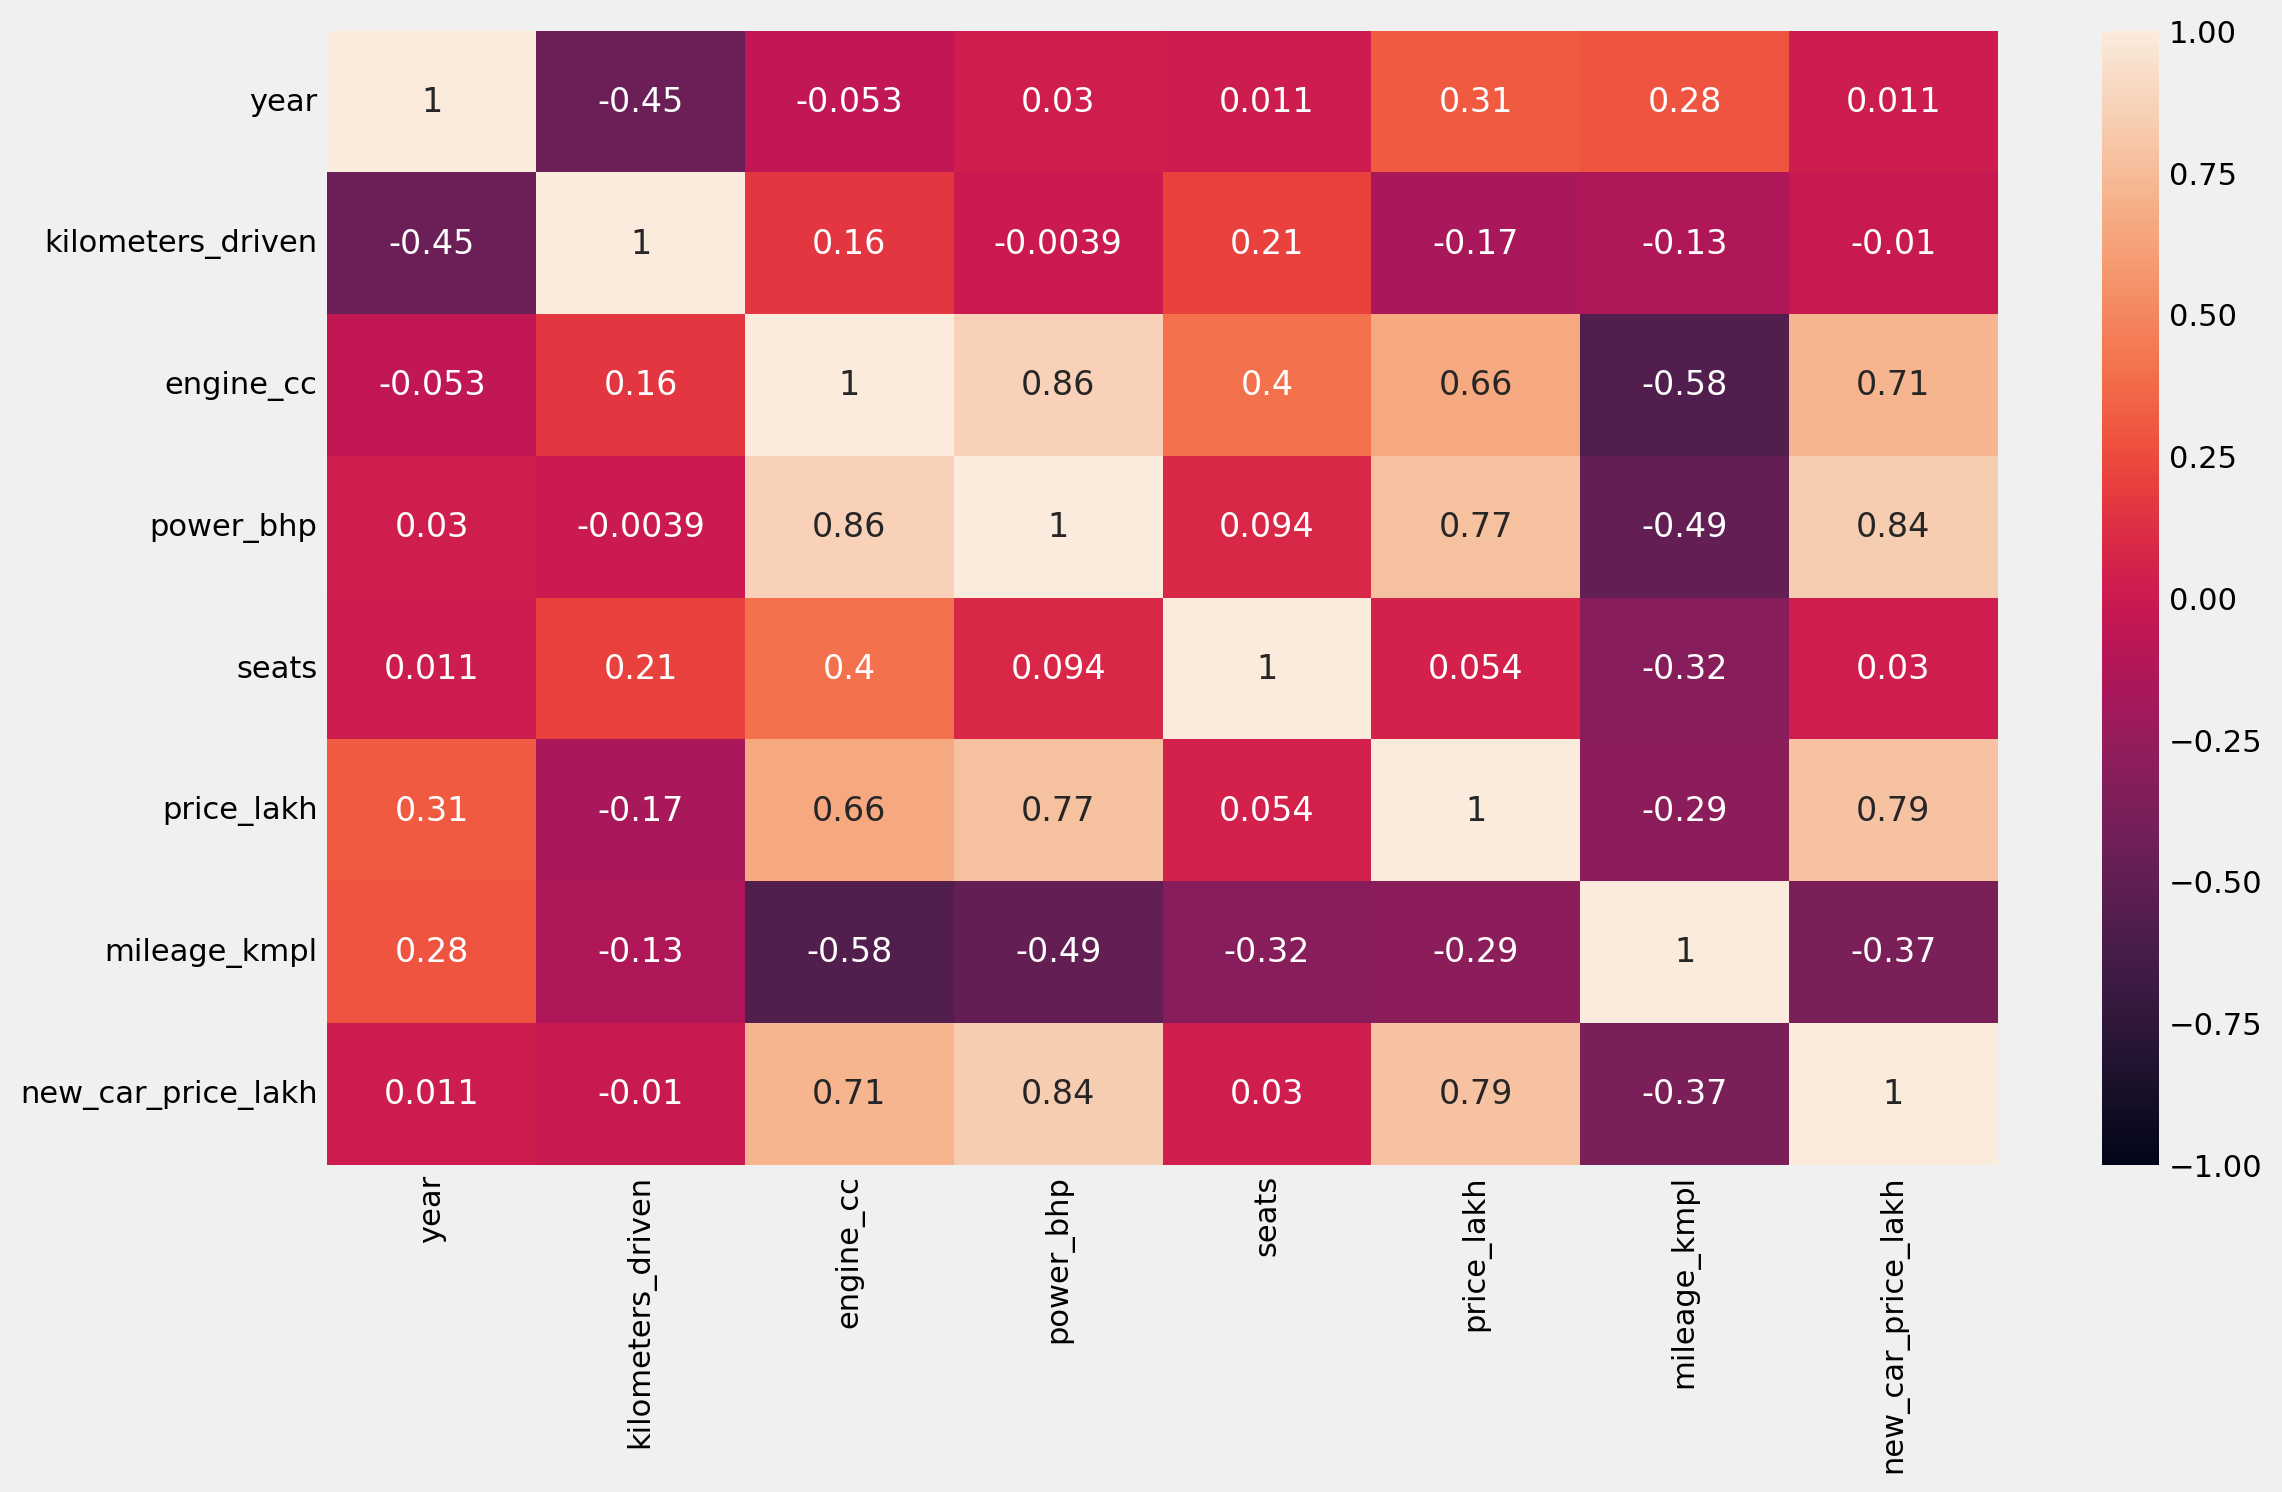

In [21]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[numeric_cols].corr(), 
            annot=True, vmin=-1, vmax=1)
plt.show()

## Save the Data

In [22]:
# save processed dataset for further analysis

filename = '../00_data/02_processed/used_cars_data_processed_01.pkl'
pickle.dump(data, open(filename, 'wb'))


---
\
[__<< Data Cleaning__](./02-Cars4u_data_cleaning.ipynb) | [__Home__](../README.md) | [__Feature Engineering >>__](./04_Cars4u_feature_engineering.ipynb)
\
\
Cars4u: Car Price Prediction, _August 2024_